## Importing Libraries and Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data 

census = pd.read_csv('india_census_housing-hlpca-full.csv')
census.head().T

0                1                2  \
State Code                           1                1                1   
State Name             JAMMU & KASHMIR  JAMMU & KASHMIR  JAMMU & KASHMIR   
District Code                        1                1                1   
District Name                  Kupwara          Kupwara          Kupwara   
Tehsil Code                          0                0                0   
...                                ...              ...              ...   
Residence_Good                    32.7             33.8             45.0   
Residence_Livable                 51.0             50.2             42.2   
Residence_Dilapidated              7.2              6.9              4.5   
Residence_cum_other                9.1              9.0              8.2   
Residence_cum_Good                 1.0              0.9              0.7   

                                     3                4  
State Code                           1                1  
State Name             JAMMU & KASHMIR  JAMMU & KASHMIR  
District Code                        2                2  
District Name                   Badgam           Badgam  
Tehsil Code                          0                0  
...                                ...              ...  
Residence_Good                    49.0             50.8  
Residence_Livable                 44.5             43.0  
Residence_Dilapidated              3.7              3.5  
Residence_cum_other                2.8              2.7  
Residence_cum_Good                 0.7              0.8  

[156 rows x 5 columns]

In [3]:
print(census.columns.to_list())
print(len(census.columns))

['State Code', 'State Name', 'District Code', 'District Name', 'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No', 'Area Name', 'Rural/Urban', 'Total Number of households', 'Total Number of Good', 'Total Number of Livable', 'Total Number of Dilapidated', 'Total Number of Residence households', 'Total Number of Residence Good', 'Total Number of Residence Livable', 'Total Number of Residence Dilapidated', 'Total Number of Residence cum other', 'Number of Residence cum Good', 'Residence_cum_Livable', 'Residence_cum_Dilapidated', 'Material_Roof_GTBW', 'Material_Roof_PP', 'Material_Roof_HMT', 'Material_Roof_MMT', 'Material_Roof_BB', 'Material_Roof_SS', 'Material_Roof_GMAS', 'Material_Roof_Concrete', 'Material_Roof_AOM', 'Material_Roof_GTB', 'Material_Roof_PP1', 'Material_Roof_MUB', 'Material_Roof_Wood', 'Material_Wall_SNPWM', 'Material_Wall_SPWM', 'Material_Wall_GIMAS', 'Material_Wall_Bb', 'Material_Wall_Concrete', 'Material_Wall_AOM', 'Material_Floor_Mud', 'Material_Floor_WB

## Data Cleaning

In [4]:
cat_col = [c for c in census.columns if census[c].dtype == 'object' ] # Categorical columns as of now
num_col = [c for c in census.columns if census[c].dtype != 'object' ] # Numerical columns as of now

print(f"cat_col : {cat_col} \nnum_col : {num_col}")

cat_col : ['State Name', 'District Name', 'Tehsil Name', 'Area Name', 'Rural/Urban'] 
num_col : ['State Code', 'District Code', 'Tehsil Code', 'Town Code/Village code', 'Ward No', 'Total Number of households', 'Total Number of Good', 'Total Number of Livable', 'Total Number of Dilapidated', 'Total Number of Residence households', 'Total Number of Residence Good', 'Total Number of Residence Livable', 'Total Number of Residence Dilapidated', 'Total Number of Residence cum other', 'Number of Residence cum Good', 'Residence_cum_Livable', 'Residence_cum_Dilapidated', 'Material_Roof_GTBW', 'Material_Roof_PP', 'Material_Roof_HMT', 'Material_Roof_MMT', 'Material_Roof_BB', 'Material_Roof_SS', 'Material_Roof_GMAS', 'Material_Roof_Concrete', 'Material_Roof_AOM', 'Material_Roof_GTB', 'Material_Roof_PP1', 'Material_Roof_MUB', 'Material_Roof_Wood', 'Material_Wall_SNPWM', 'Material_Wall_SPWM', 'Material_Wall_GIMAS', 'Material_Wall_Bb', 'Material_Wall_Concrete', 'Material_Wall_AOM', 'Material_Floor_Mu

In [5]:
# Numerical Data
num_census = census[num_col].copy()
num_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Columns: 151 entries, State Code to Residence_cum_Good
dtypes: float64(142), int64(9)
memory usage: 2.2 MB


In [6]:
# Missing values
num_census.isna().sum().sum()

0

In [7]:
# Description of Data
num_census.describe().T

count        mean         std   min      25%    50%  \
State Code              1908.0   17.088050    9.392094   1.0    9.000   18.0   
District Code           1908.0  320.066038  184.280200   1.0  161.000  320.0   
Tehsil Code             1908.0    0.000000    0.000000   0.0    0.000    0.0   
Town Code/Village code  1908.0    0.000000    0.000000   0.0    0.000    0.0   
Ward No                 1908.0    0.000000    0.000000   0.0    0.000    0.0   
...                        ...         ...         ...   ...      ...    ...   
Residence_Good          1908.0   51.840928   14.883375  11.3   40.975   51.3   
Residence_Livable       1908.0   39.777642   12.416863   6.4   30.000   39.4   
Residence_Dilapidated   1908.0    4.617820    3.024833   0.0    2.300    4.0   
Residence_cum_other     1908.0    3.763884    3.791460   0.1    1.700    2.8   
Residence_cum_Good      1908.0    1.856688    1.620250   0.1    0.900    1.4   

                            75%    max  
State Code               24.000   35.0  
District Code           479.000  640.0  
Tehsil Code               0.000    0.0  
Town Code/Village code    0.000    0.0  
Ward No                   0.000    0.0  
...                         ...    ...  
Residence_Good           63.925   90.1  
Residence_Livable        48.900   73.8  
Residence_Dilapidated     6.200   19.5  
Residence_cum_other       4.500   58.7  
Residence_cum_Good        2.400   17.7  

[151 rows x 8 columns]

### Outlier Detection

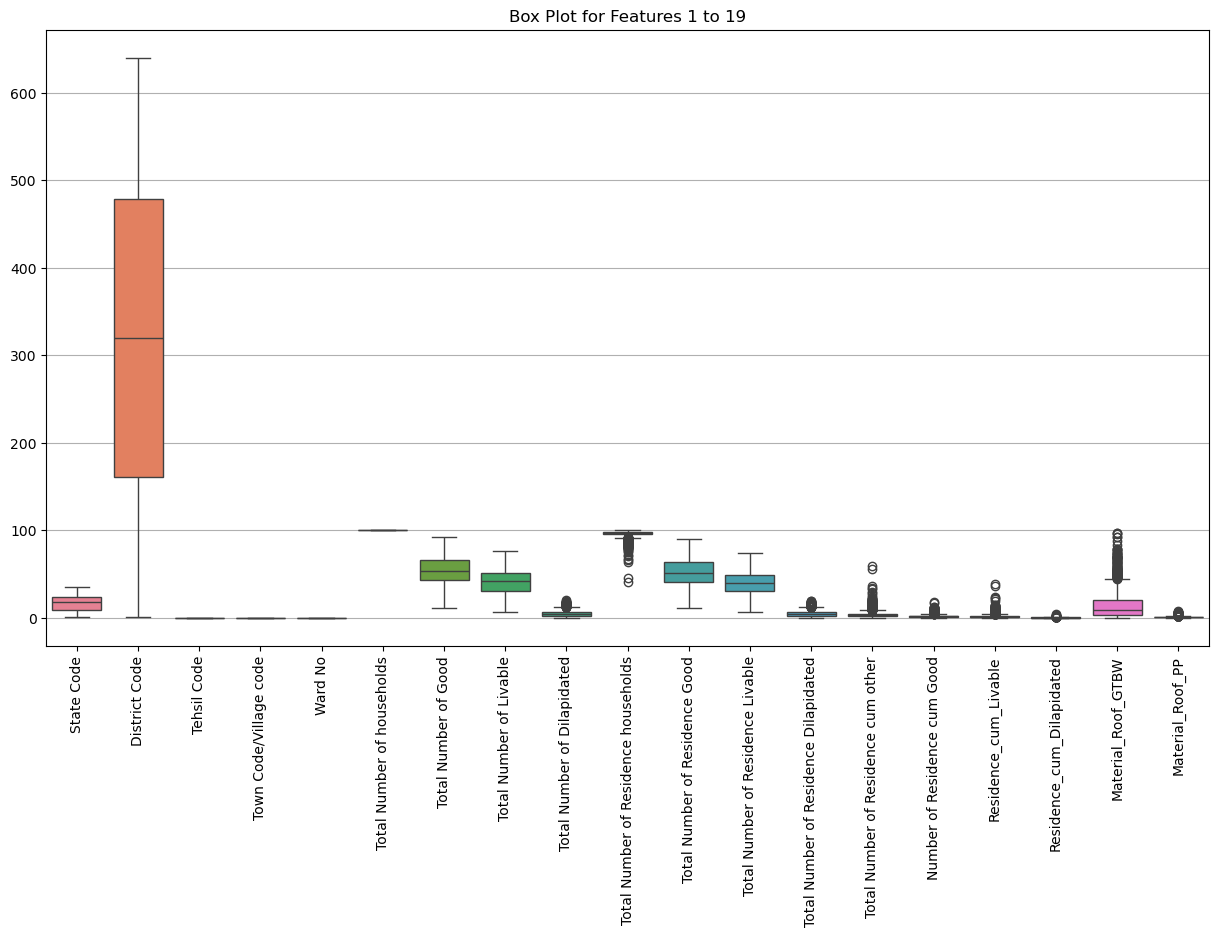

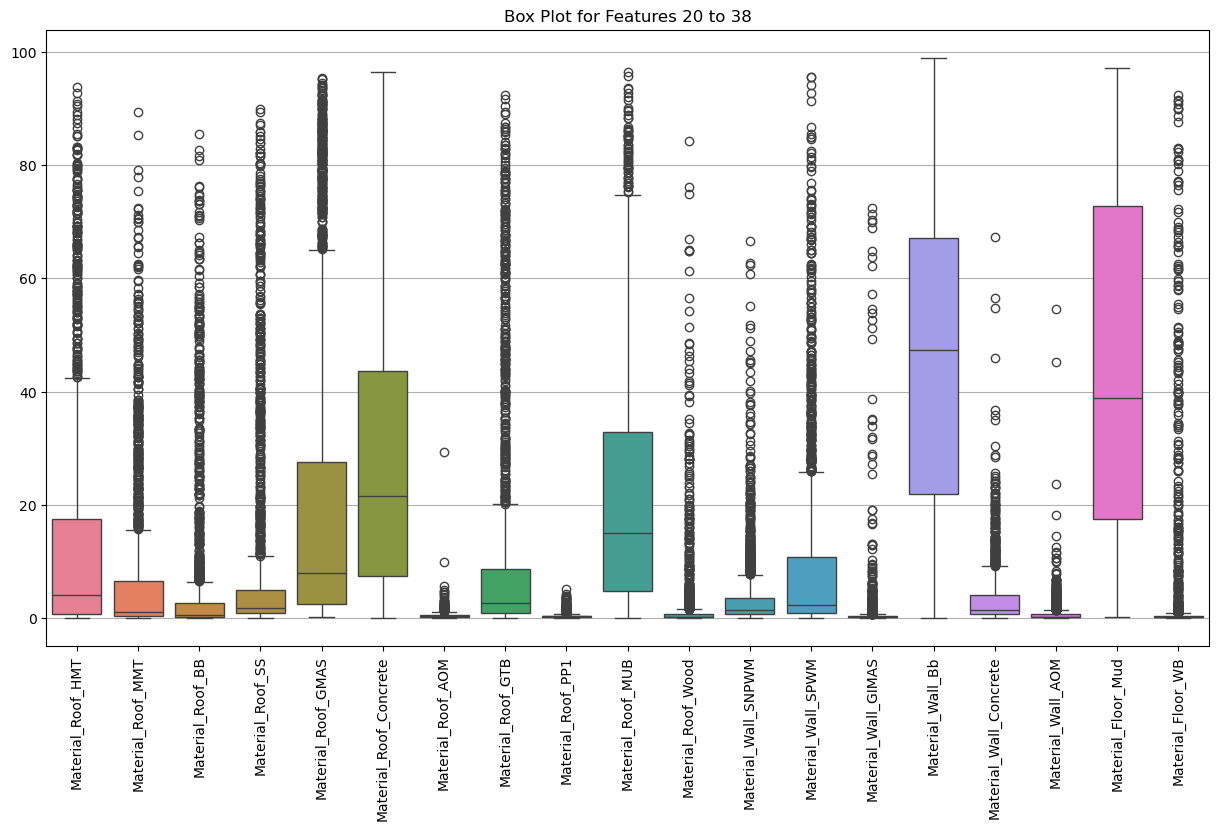

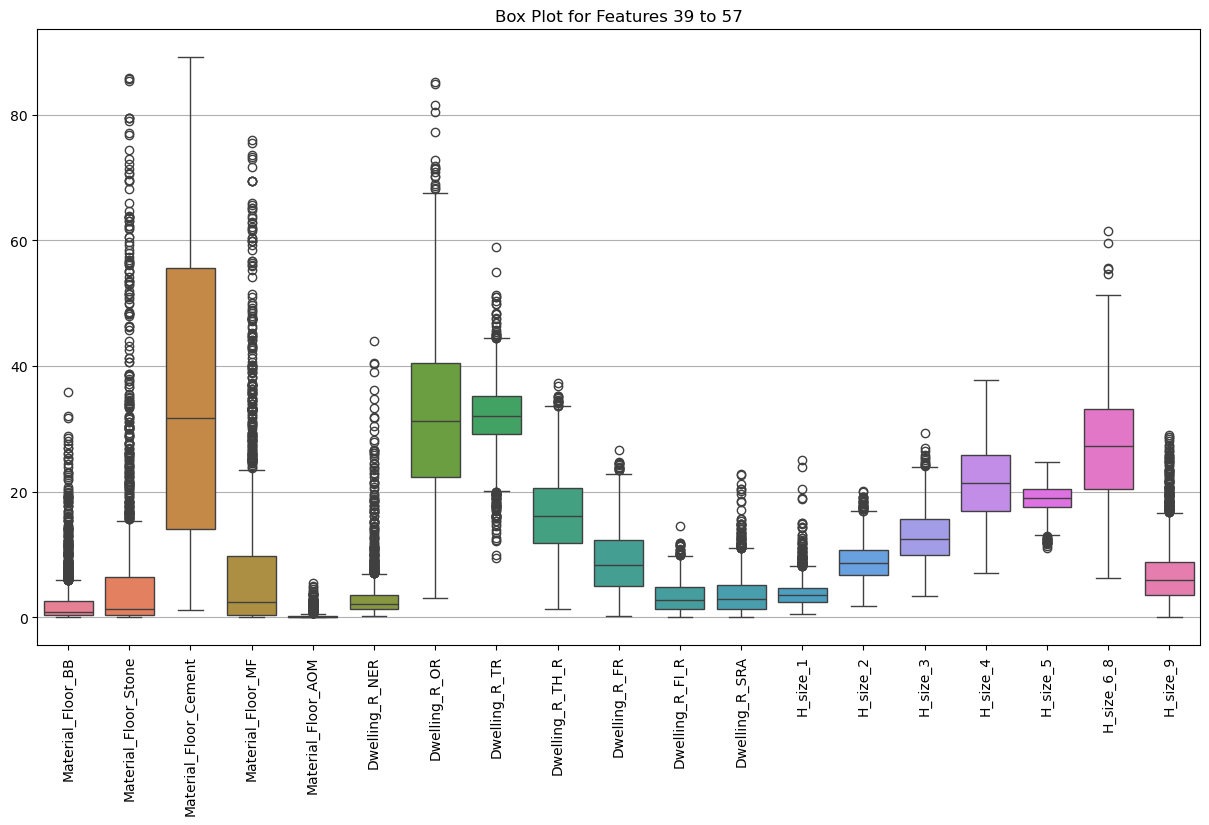

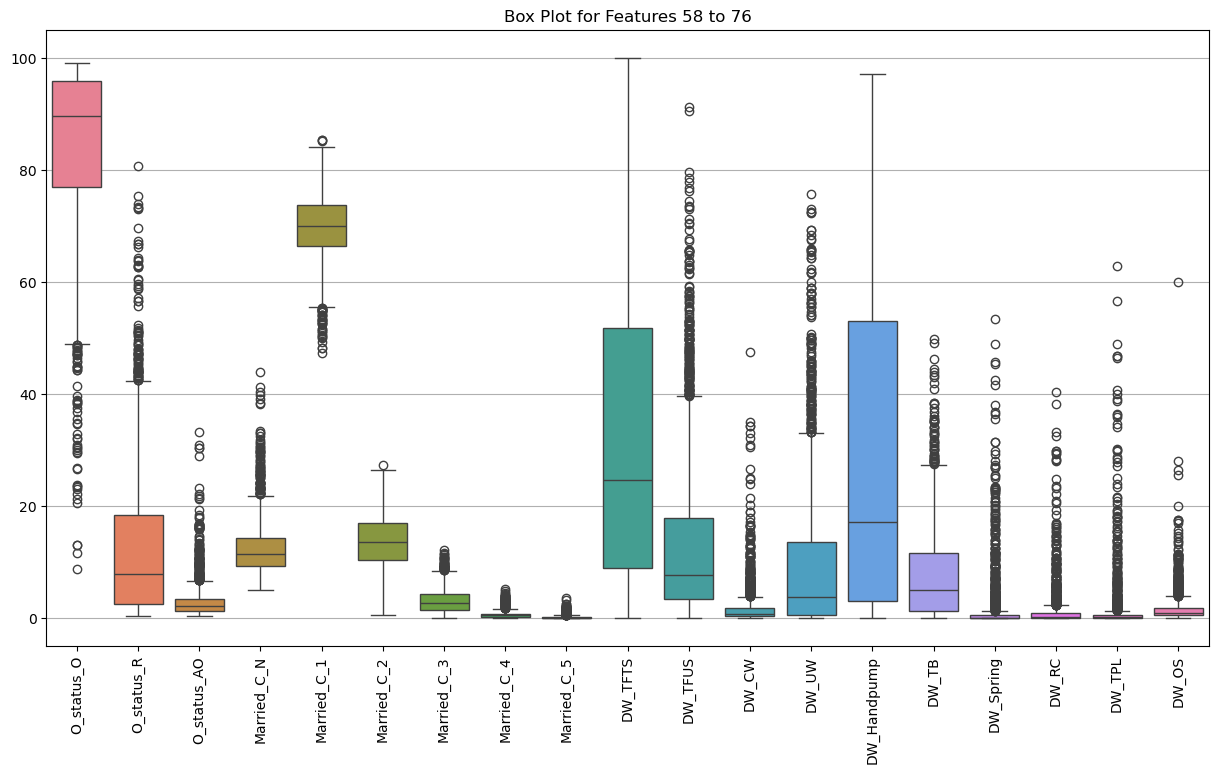

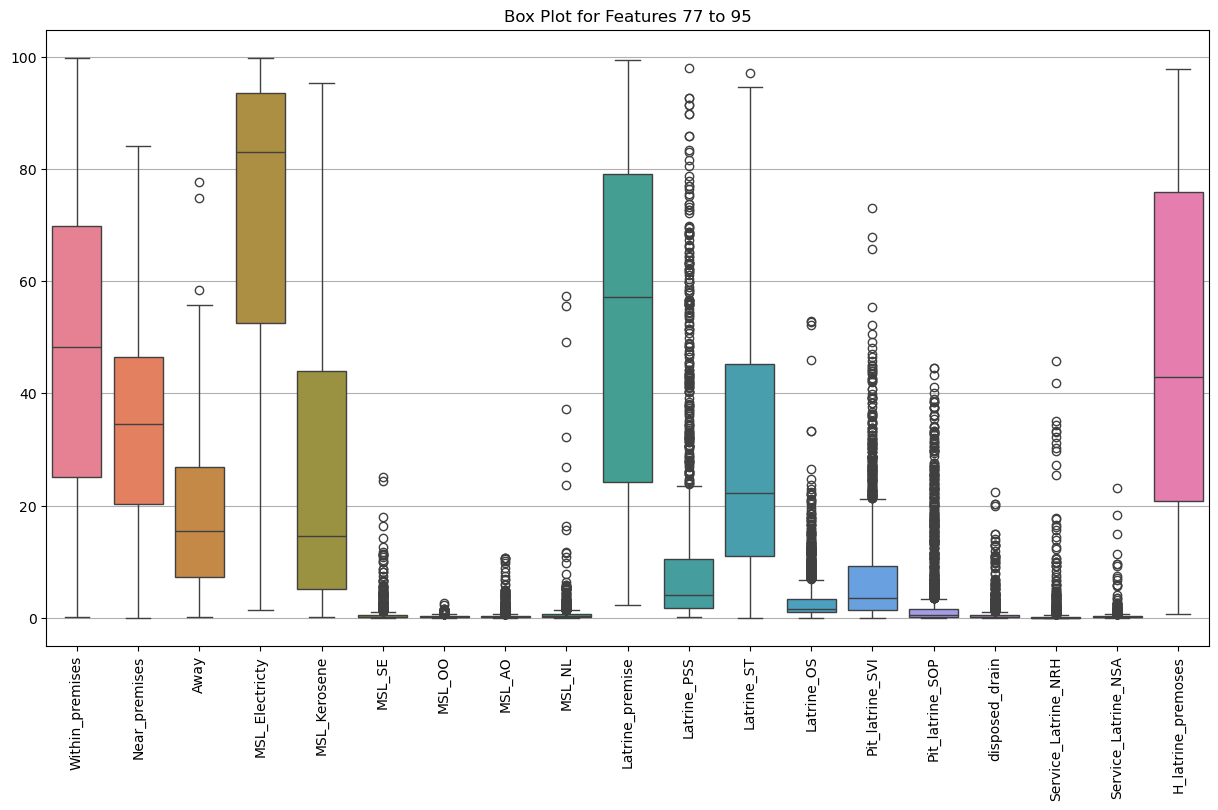

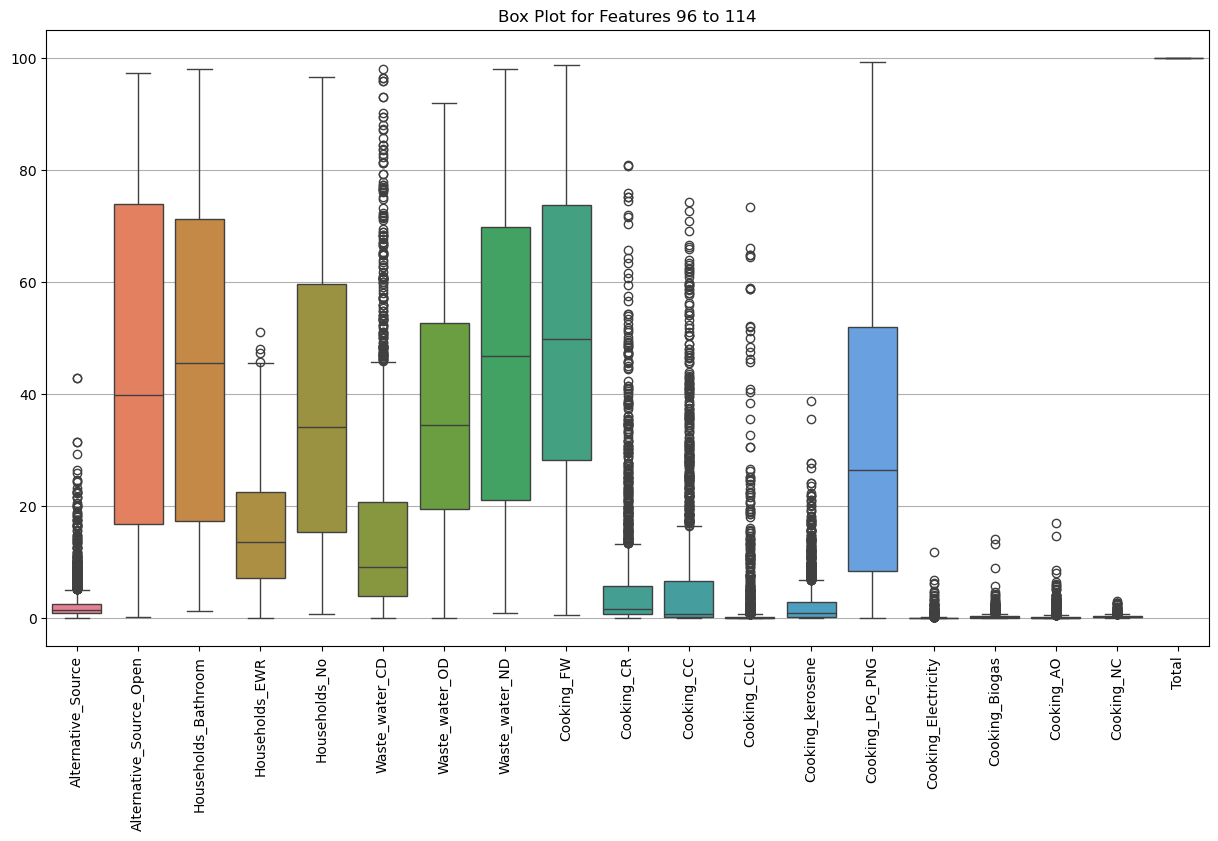

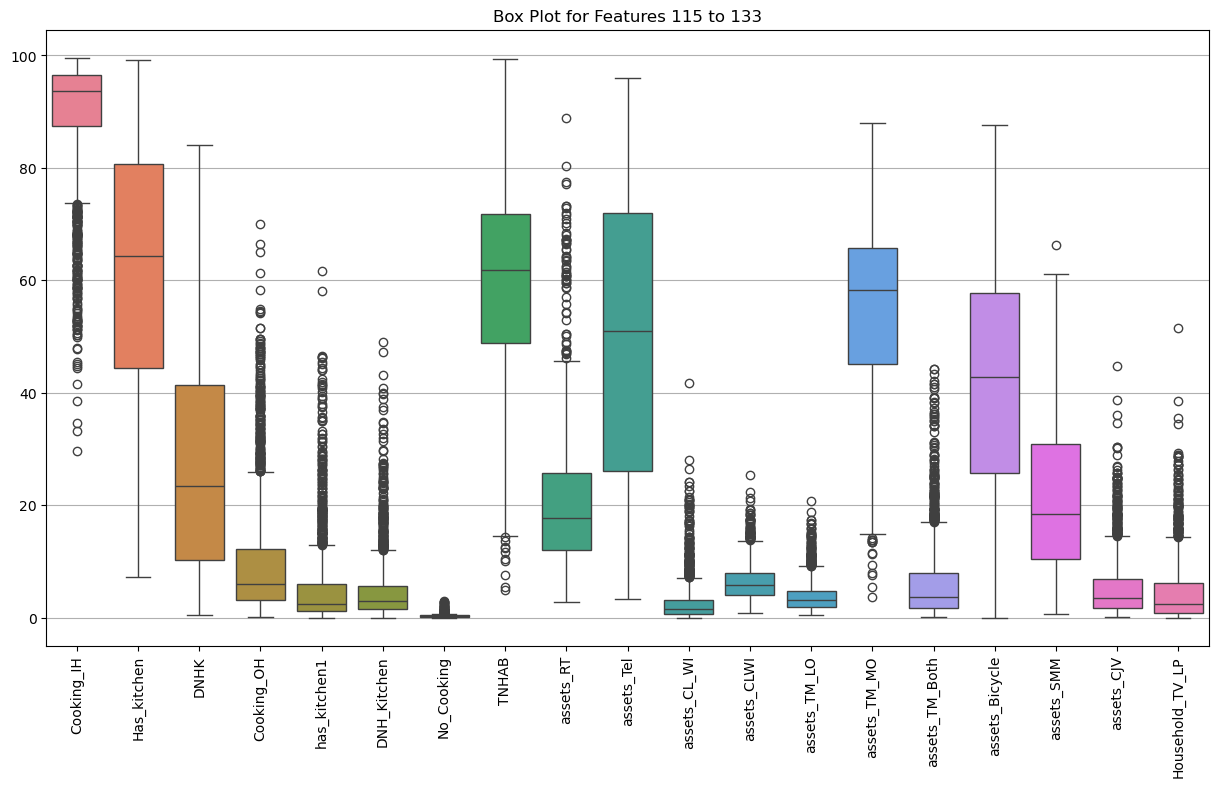

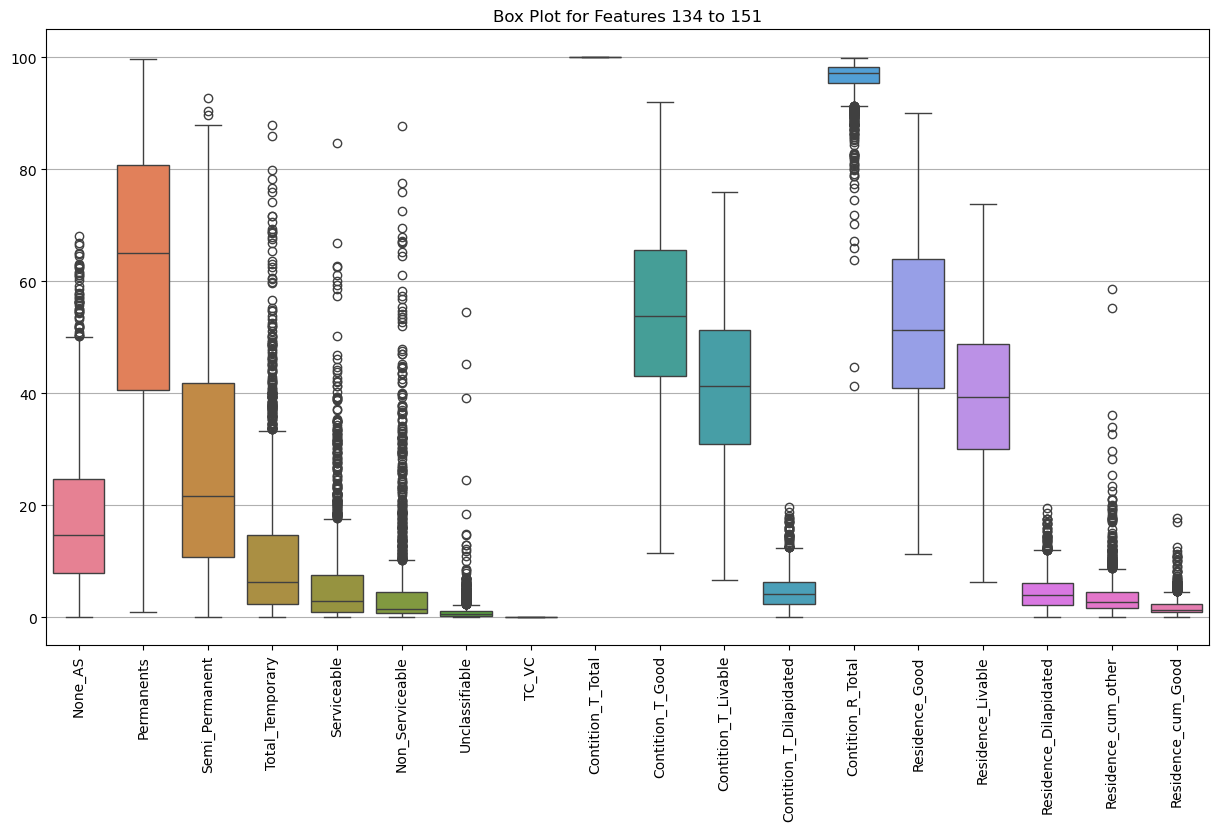

In [8]:
# Assuming num_census is a pandas DataFrame with 152 features
num_features = num_census.shape[1]
features_per_plot = 19  # Number of features per plot

# Loop through features in increments of features_per_plot
for i in range(0, num_features, features_per_plot):
    plt.figure(figsize=(15, 8))
    
    # Create boxplot for the current set of features
    # Use iloc to select the appropriate columns
    sns.boxplot(data=num_census.iloc[:, i:i + features_per_plot])
    
    plt.title(f'Box Plot for Features {i + 1} to {min(i + features_per_plot, num_features)}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.grid(axis='y')
    plt.show()


### Feature Scaling 
(Reduce the effect of Outliers)

In [9]:
scaler = StandardScaler()
num_df_scaled = num_census.copy()
for f in num_census.columns:
    num_df_scaled[f]=scaler.fit_transform(num_census[[f]])

# Show the scaled data
print("Scaled DataFrame:")
num_df_scaled.info()

Scaled DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Columns: 151 entries, State Code to Residence_cum_Good
dtypes: float64(151)
memory usage: 2.2 MB


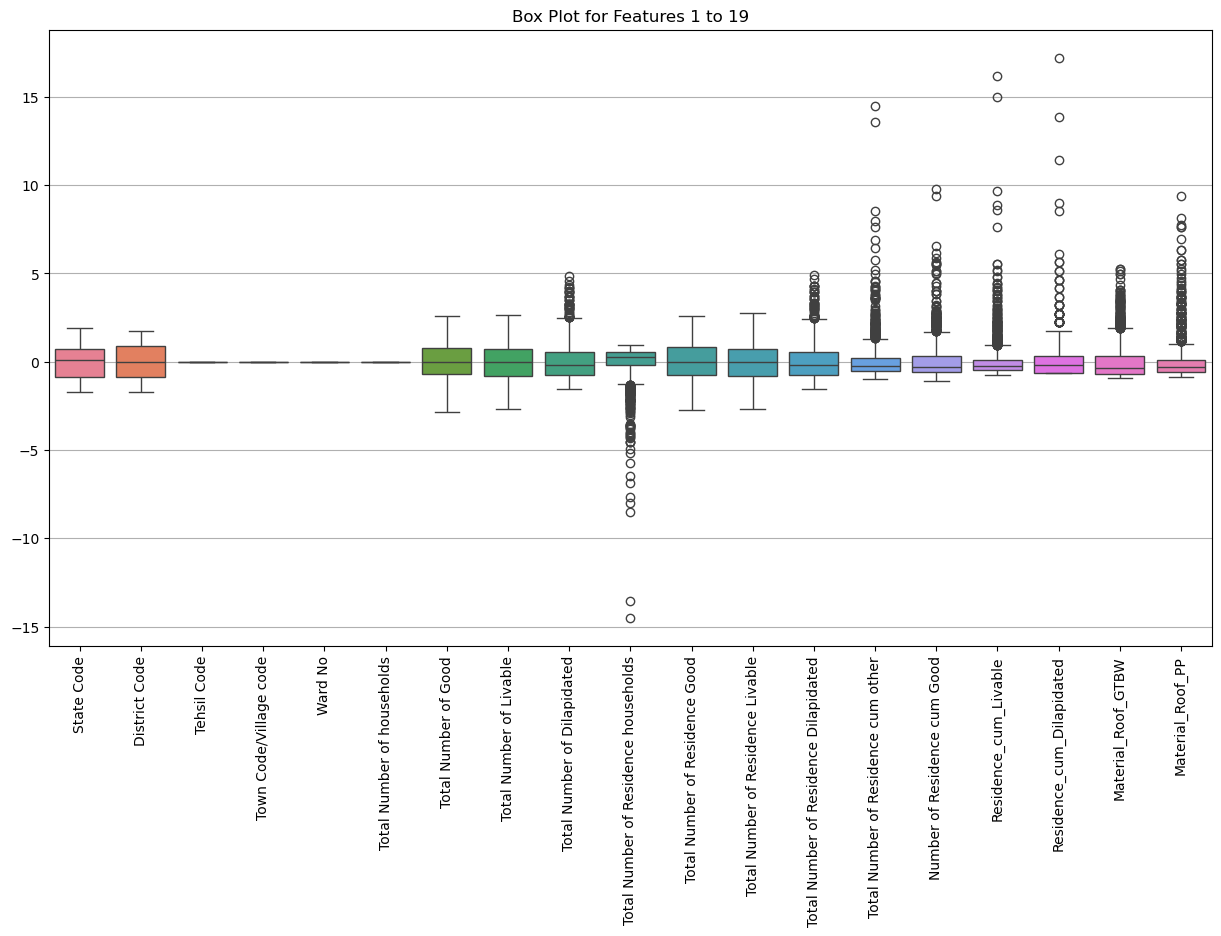

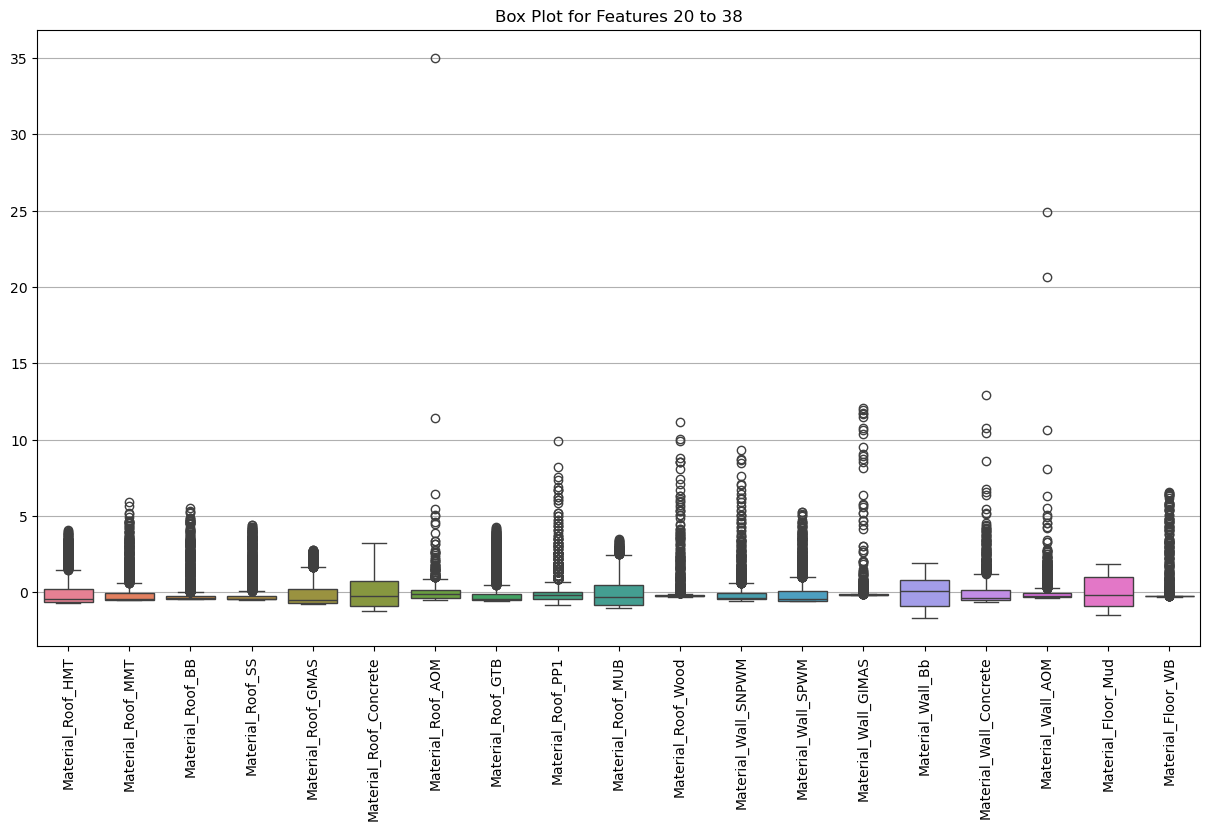

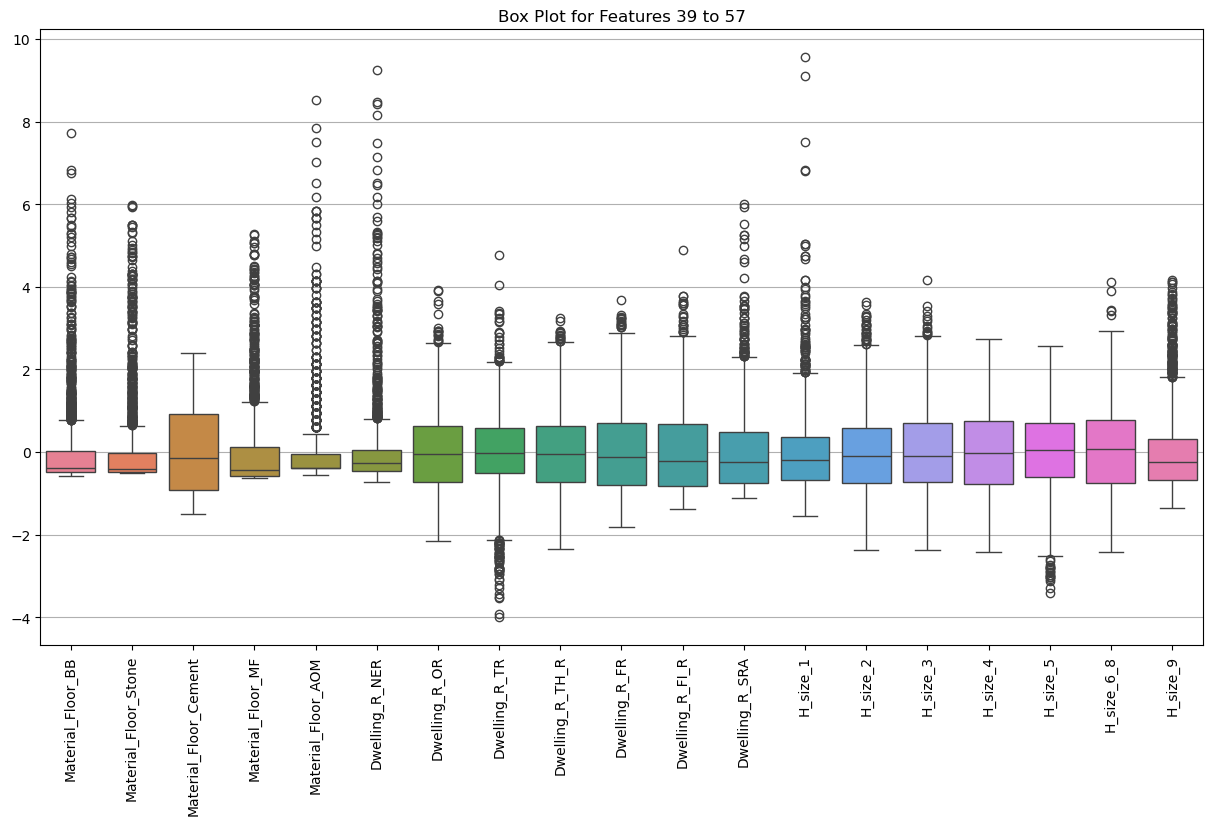

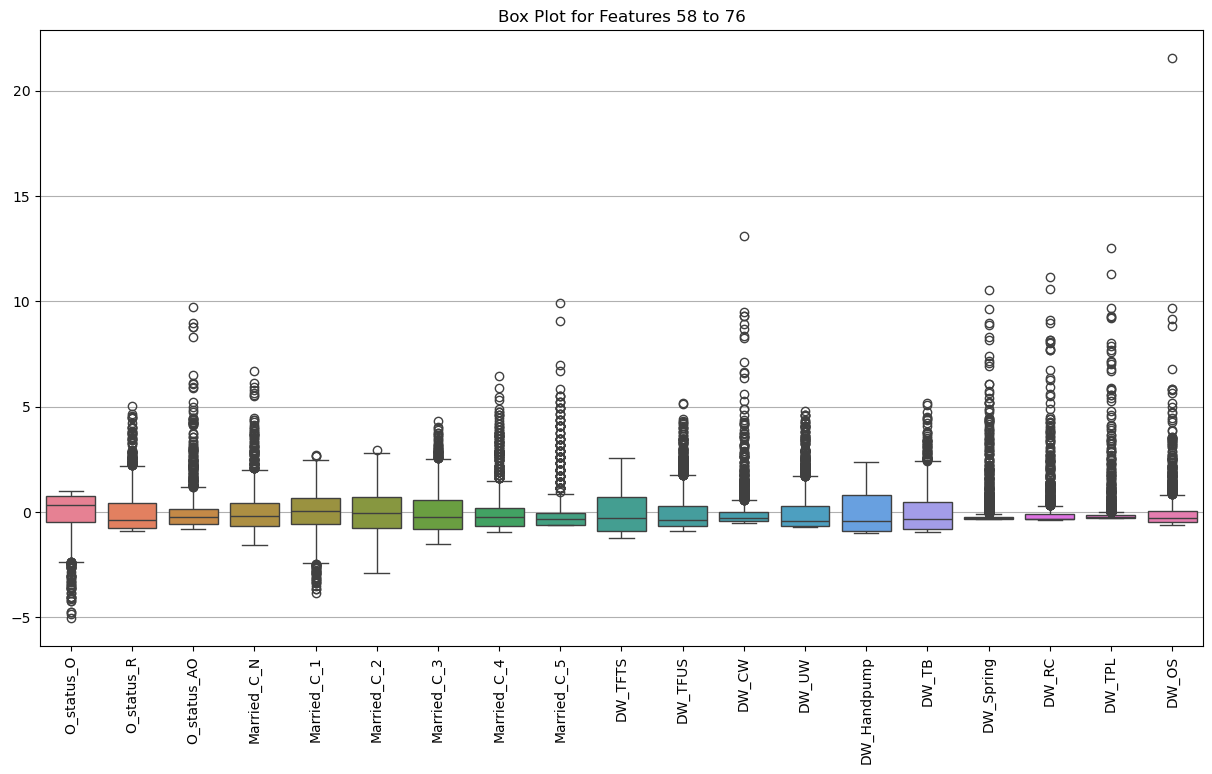

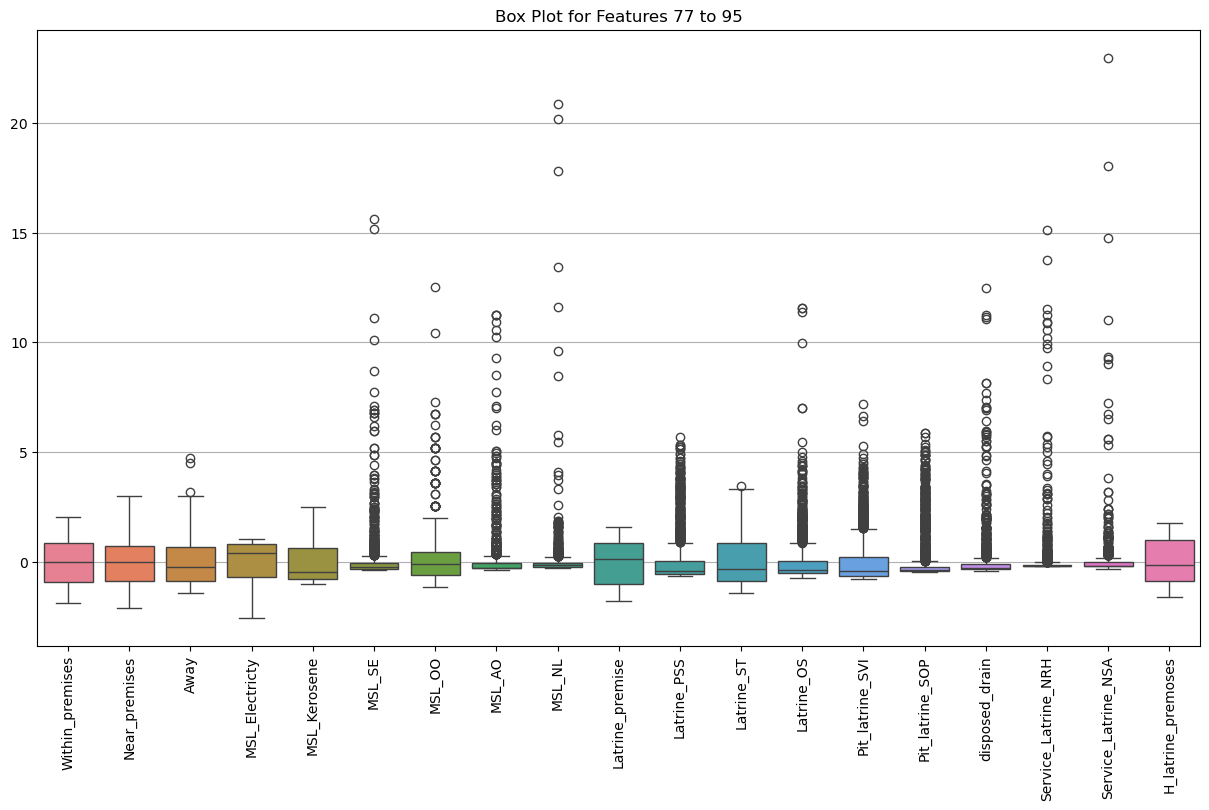

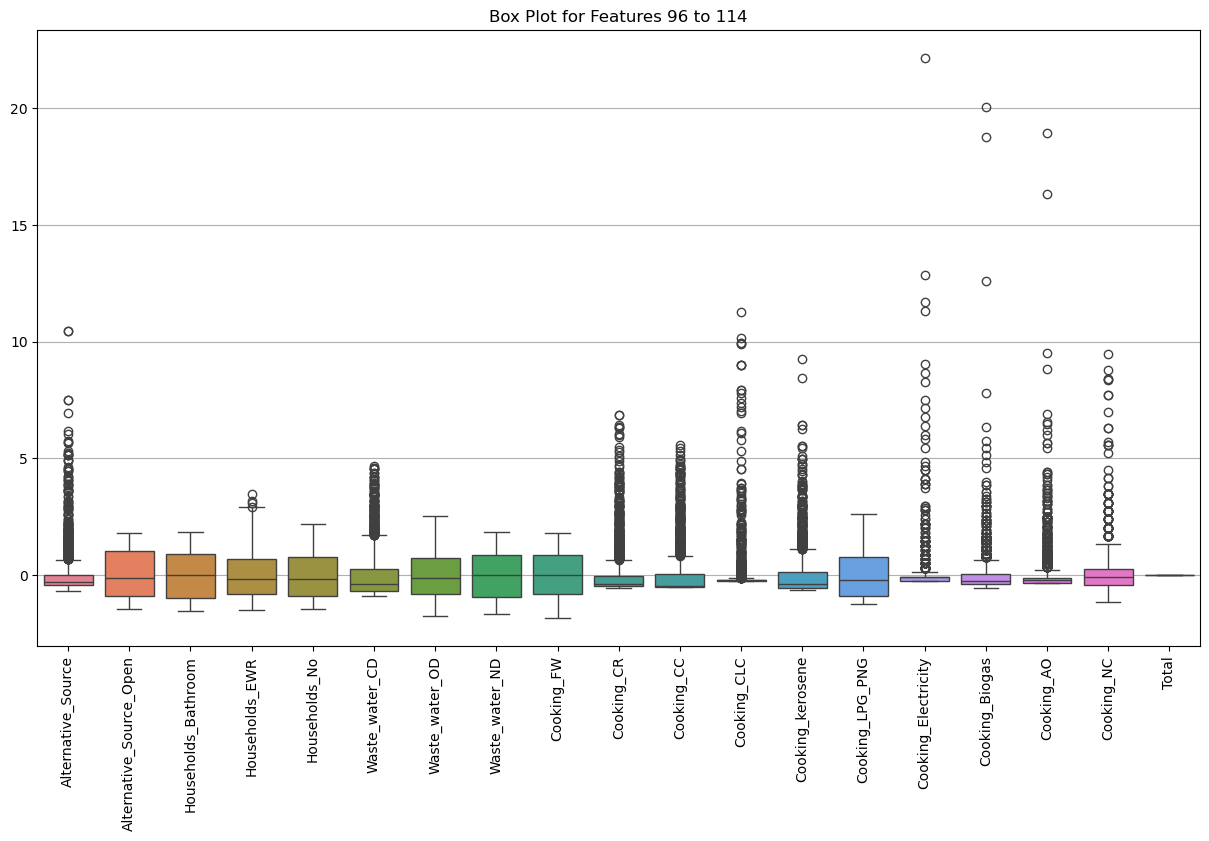

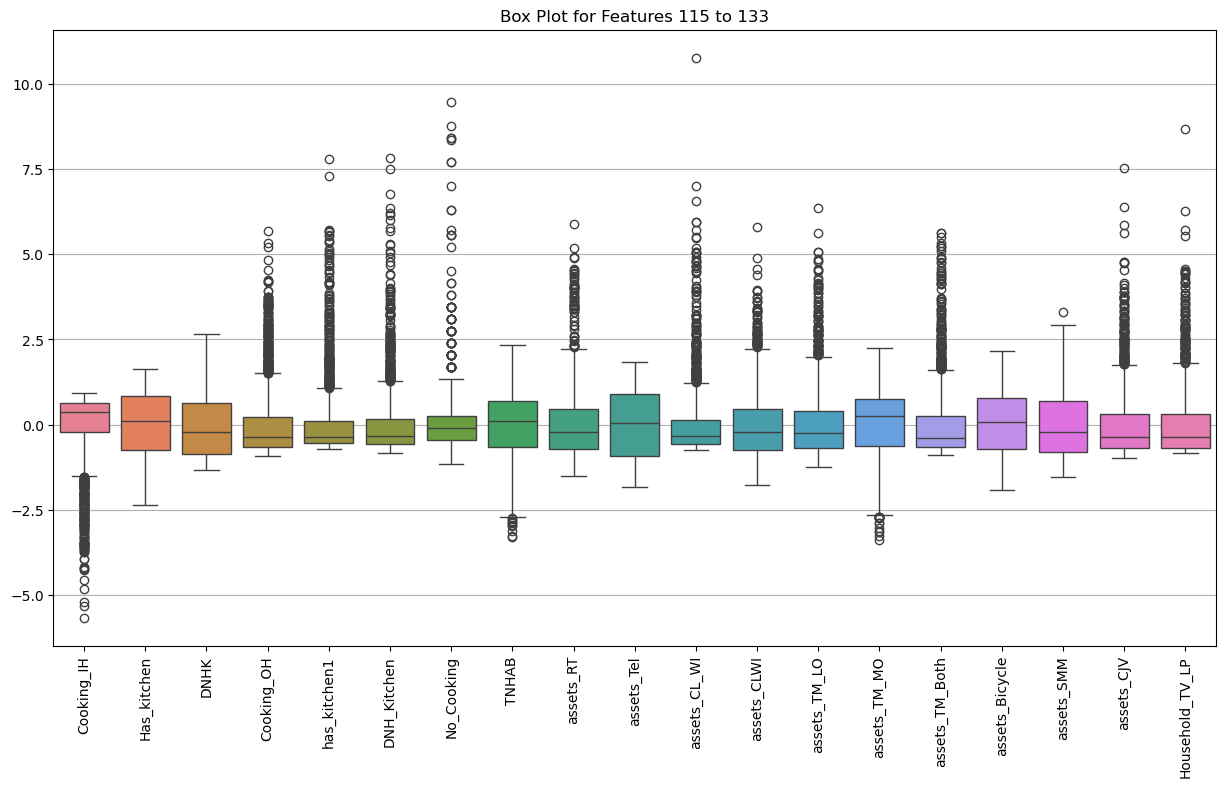

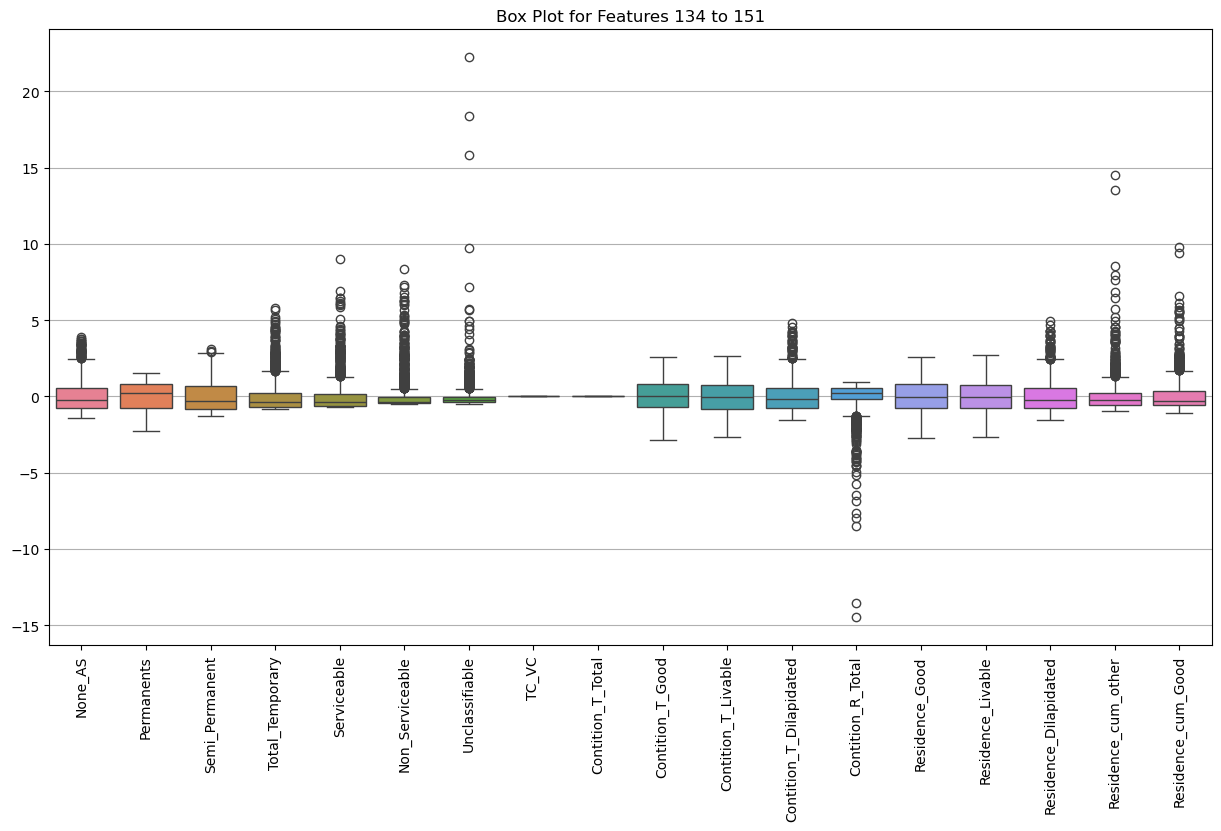

In [10]:
# Assuming num_census is a pandas DataFrame with 152 features
num_features = num_df_scaled.shape[1]
features_per_plot = 19  # Number of features per plot

# Loop through features in increments of features_per_plot
for i in range(0, num_features, features_per_plot):
    plt.figure(figsize=(15, 8))
    
    # Create boxplot for the current set of features
    # Use iloc to select the appropriate columns
    sns.boxplot(data=num_df_scaled.iloc[:, i:i + features_per_plot])
    
    plt.title(f'Box Plot for Features {i + 1} to {min(i + features_per_plot, num_features)}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.grid(axis='y')
    plt.show()


## Principal Component Analysis

In [11]:
# Step 1: Set the target variance threshold (e.g., 90%)
target_variance = 0.90

# Step 2: Fit PCA for all components
pca = PCA()
pca.fit(num_df_scaled)

# Step 3: Calculate the cumulative explained variance for each number of components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Find the number of components that explain the target variance
optimal_components = np.argmax(cumulative_variance >= target_variance) + 1  # +1 for actual number

print(f'Optimal number of principal components: {optimal_components}')

# Step 5: Create an interactive plot using Plotly
fig = go.Figure()

# Add a line trace for the cumulative explained variance
fig.add_trace(go.Scatter(
    x=np.arange(1, len(cumulative_variance) + 1),
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Explained Variance',
    line=dict(color='blue'),
    marker=dict(size=8, color='blue')
))

# Add a horizontal line for the target variance threshold
fig.add_trace(go.Scatter(
    x=[1, len(cumulative_variance)],
    y=[target_variance, target_variance],
    mode='lines',
    name=f'{target_variance * 100}% Target Variance',
    line=dict(color='red', dash='dash')
))

# Update layout for interactivity and readability
fig.update_layout(
    title='Cumulative Explained Variance by Principal Components',
    xaxis_title='Number of Principal Components',
    yaxis_title='Cumulative Explained Variance',
    xaxis=dict(tickmode='linear'),
    hovermode='x unified',
    template='plotly_white'
)

# Add annotations to show the optimal number of components
fig.add_annotation(
    x=optimal_components,
    y=cumulative_variance[optimal_components - 1],
    text=f"Optimal PCs: {optimal_components}",
    showarrow=True,
    arrowhead=2,
    ax=50,
    ay=-40
)

# Show interactive plot
fig.show()


Optimal number of principal components: 40


In [12]:
# Initialize PCA and fit to the data
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(num_df_scaled)

# Get standard deviations (sqrt of the eigenvalues)
std_dev = np.round(np.sqrt(pca.explained_variance_),4)

# Get proportion of variance
prop_variance = np.round(pca.explained_variance_ratio_,4)

# Get cumulative proportion
cumulative_prop = np.round(np.cumsum(prop_variance),4)

# Create a DataFrame for summary
pca_summary = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': prop_variance,
    'Cumulative Proportion': cumulative_prop
})

# Set appropriate index labels for components
pca_summary.index = [f'PC{i+1}' for i in range(len(std_dev))]

print("Importance of components : \n",pca_summary)

Importance of components : 
       Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1               5.8422                  0.2369                 0.2369
PC2               3.9388                  0.1077                 0.3446
PC3               3.1513                  0.0689                 0.4135
PC4               2.6838                  0.0500                 0.4635
PC5               2.4092                  0.0403                 0.5038
PC6               2.2776                  0.0360                 0.5398
PC7               2.0417                  0.0289                 0.5687
PC8               1.8551                  0.0239                 0.5926
PC9               1.7865                  0.0222                 0.6148
PC10              1.6972                  0.0200                 0.6348
PC11              1.6758                  0.0195                 0.6543
PC12              1.5519                  0.0167                 0.6710
PC13              1.5311           

In [13]:
# Get factor loadings (component loadings)
factor_loadings = np.round(pca.components_.T,3)  # Transpose to match the original feature space

# Create a DataFrame for factor loadings
factor_loadings_df = pd.DataFrame(
    factor_loadings,
    index=num_df_scaled.columns,  # Features as index
    columns=[f'PC{i+1}' for i in range(factor_loadings.shape[1])]  # Principal components as columns
)
print("Rotation (n x k) = (52 X 52)")
print(factor_loadings_df)

Rotation (n x k) = (52 X 52)
                          PC1    PC2    PC3    PC4    PC5    PC6    PC7  \
State Code              0.021 -0.142 -0.162  0.009  0.002 -0.059  0.003   
District Code           0.019 -0.140 -0.158  0.014  0.001 -0.045  0.012   
Tehsil Code            -0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
Town Code/Village code  0.000 -0.000 -0.000 -0.000  0.000 -0.000 -0.000   
Ward No                -0.000  0.000  0.000 -0.000 -0.000  0.000 -0.000   
...                       ...    ...    ...    ...    ...    ...    ...   
Residence_Good          0.150 -0.042 -0.050  0.051 -0.102  0.056 -0.002   
Residence_Livable      -0.148  0.001  0.060 -0.071  0.041 -0.043  0.049   
Residence_Dilapidated  -0.094  0.024  0.049 -0.219  0.083 -0.090 -0.073   
Residence_cum_other    -0.030  0.140 -0.041  0.208  0.199 -0.007 -0.098   
Residence_cum_Good      0.008  0.143 -0.048  0.206  0.180  0.021 -0.078   

                          PC8    PC9   PC10  ...   PC31   PC32   PC33 

### EDA

Factor Loadings Shape: (151, 40)
Number of Features: 151


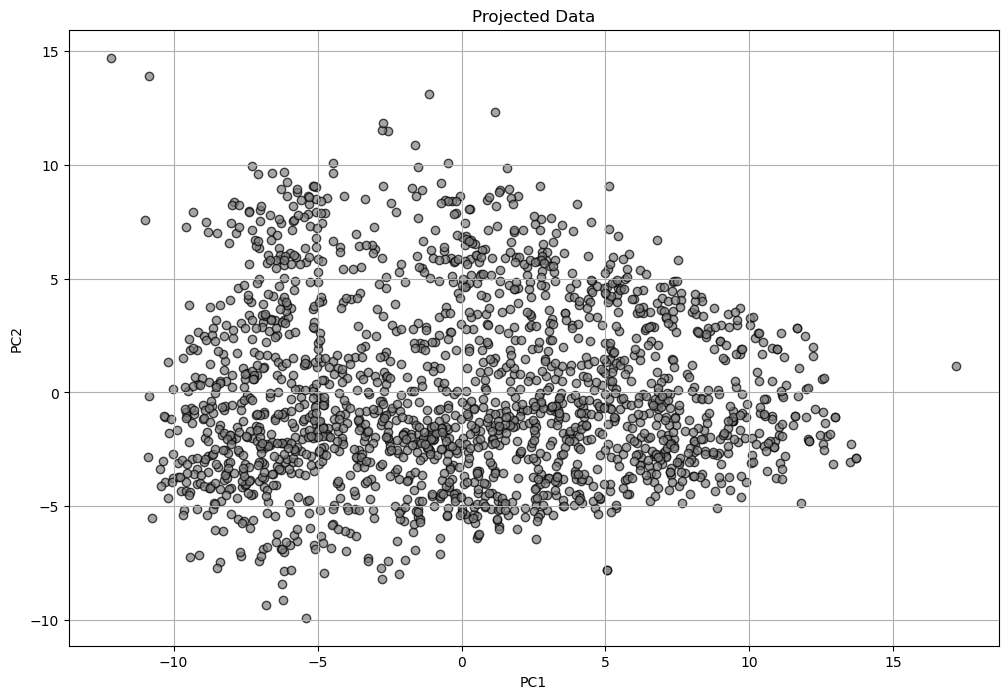

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:,0], df_pca[:,1],c='grey', edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data')

# Get the factor loadings
factor_loadings = pca.components_.T  # Transpose to match feature space
features = num_df_scaled.columns

# Check dimensions
print("Factor Loadings Shape:", factor_loadings.shape)  # Should be (n_features, n_components)
print("Number of Features:", len(features))  # Should match number of rows in factor_loadings

#for i in range(factor_loadings.shape[0]):
#    plt.arrow(0, 0, factor_loadings[i, 0] * 2, factor_loadings[i, 1] * 2,
#              color='red', head_width=0.1, head_length=0.1)
#    plt.text(factor_loadings[i, 0] * 2.5, factor_loadings[i, 1] * 2.5, features[i], color='red')

plt.grid()
plt.show()


## Segmentation
### Sum of Within cluster distances

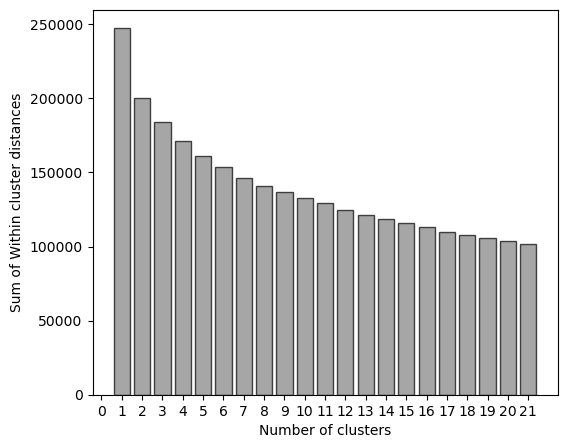

In [15]:
WCSS = []
for i in range(1,22):
    model = KMeans(n_clusters = i,n_init = 10,random_state=1234)
    model.fit(df_pca)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,5))
plt.bar(range(1,22),WCSS, linewidth=1,color='grey', edgecolor='k',alpha=0.7)
plt.xticks(np.arange(22))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Within cluster distances")
plt.show()

### Segment Stability Across Solutions

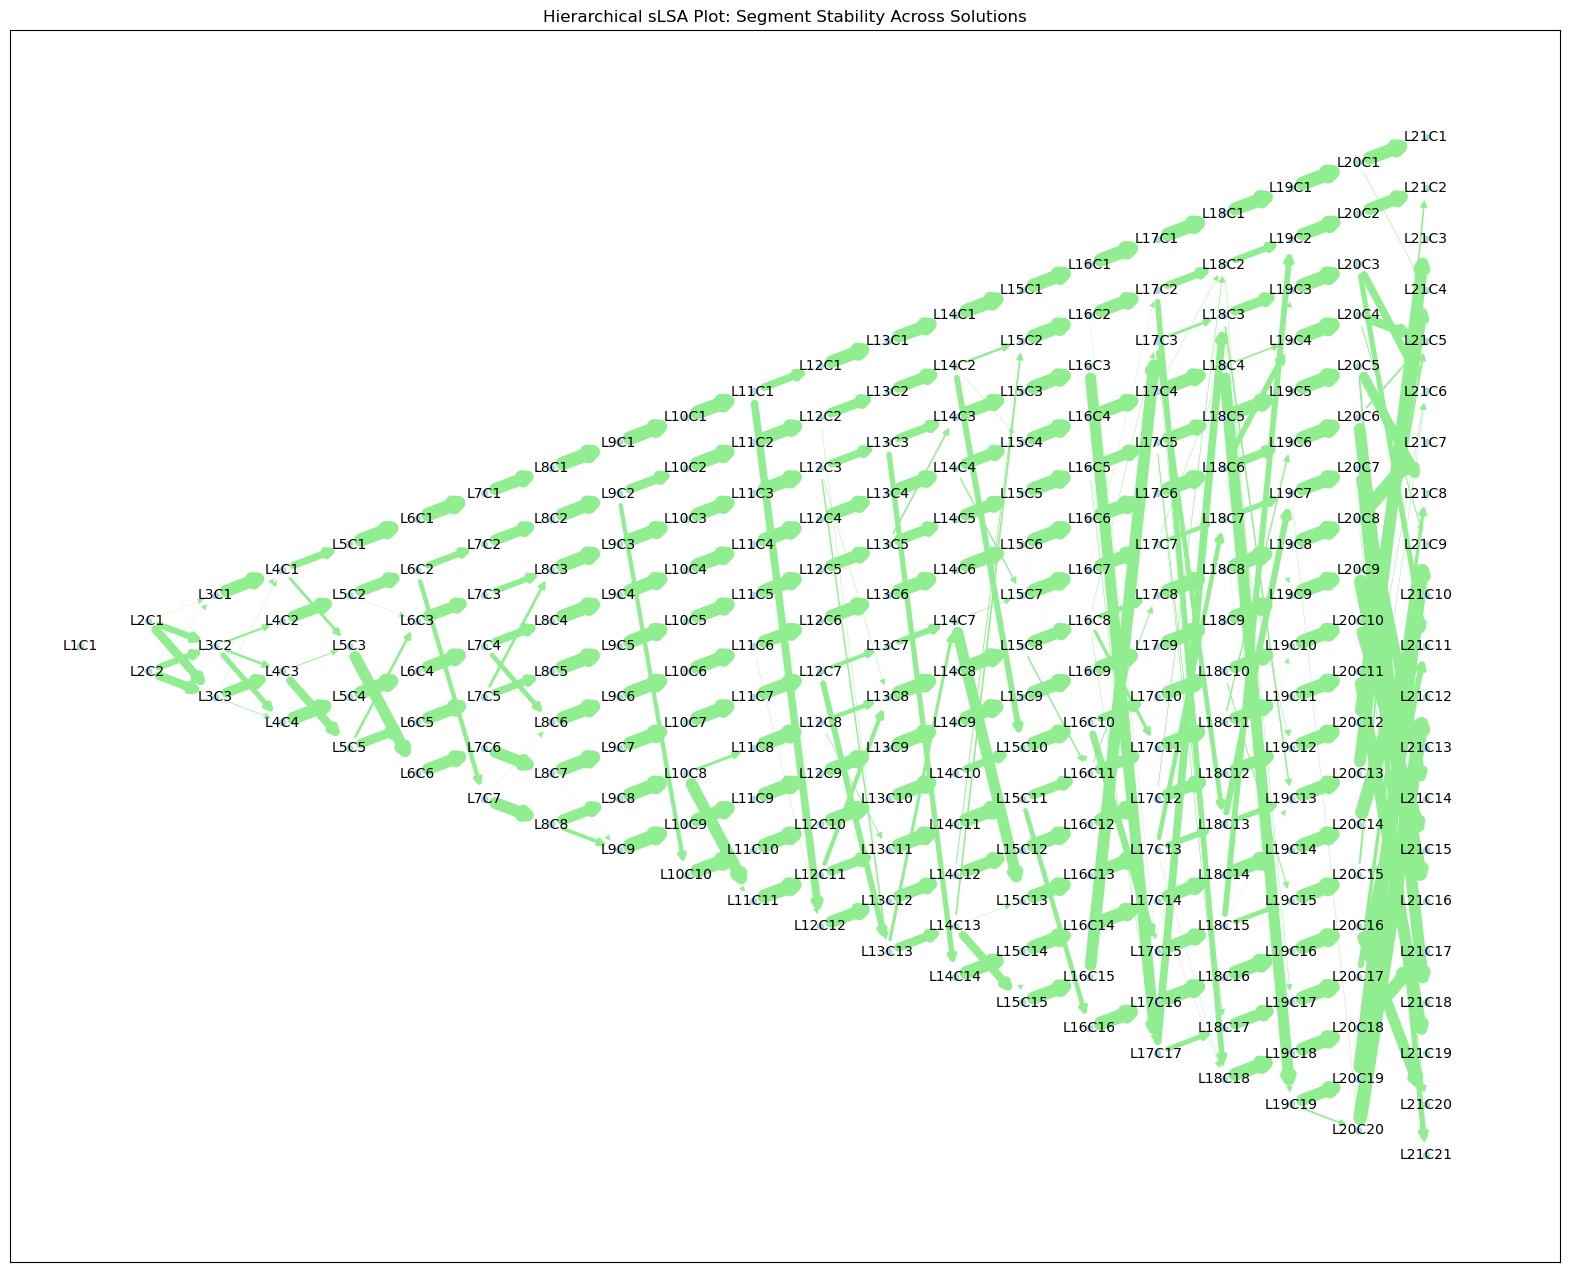

In [16]:
# List of k values (clusters) from 1 to 22
k_values = list(range(1, 22))

# Perform KMeans clustering for each k value
cluster_assignments = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    cluster_assignments.append(kmeans.labels_)

# Initialize a graph
G = nx.DiGraph()  # Directed graph to show hierarchical connections

# Add nodes for each solution (clusters for each k)
for level, k in enumerate(k_values):
    for cluster in range(k):
        G.add_node(f'L{level+1}C{cluster+1}', label=f'{cluster+1}', level=level)

# Add edges based on similarity (Adjusted Rand Index) between successive levels
for level in range(len(k_values) - 1):
    current_clusters = cluster_assignments[level]
    next_clusters = cluster_assignments[level + 1]

    # Loop through clusters in the current and next level and calculate ARI
    for cluster_current in np.unique(current_clusters):
        for cluster_next in np.unique(next_clusters):
            # Create a binary mask for the current and next clusters
            mask_current = (current_clusters == cluster_current)
            mask_next = (next_clusters == cluster_next)

            # Calculate Adjusted Rand Index between clusters
            ari = adjusted_rand_score(mask_current, mask_next)

            # Add an edge if ARI is positive
            if ari > 0:
                G.add_edge(f'L{level+1}C{cluster_current+1}', f'L{level+2}C{cluster_next+1}', weight=ari)

# Set node levels for layout
for node in G.nodes():
    G.nodes[node]['level'] = G.nodes[node]['level']  # This line ensures the level is set for each node
plt.figure(figsize=(20, 16))
# Plot the hierarchical network graph
pos = nx.multipartite_layout(G, subset_key='level')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=20)

# Draw edges with thickness proportional to ARI
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[10 * d['weight'] for (_, _, d) in edges], edge_color='lightgreen')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Show edge labels (ARI values)
#edge_labels = {(i, j): f'{d["weight"]:.2f}' for i, j, d in edges}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set plot title
plt.title('Hierarchical sLSA Plot: Segment Stability Across Solutions')
plt.show()


### Silhouette Score

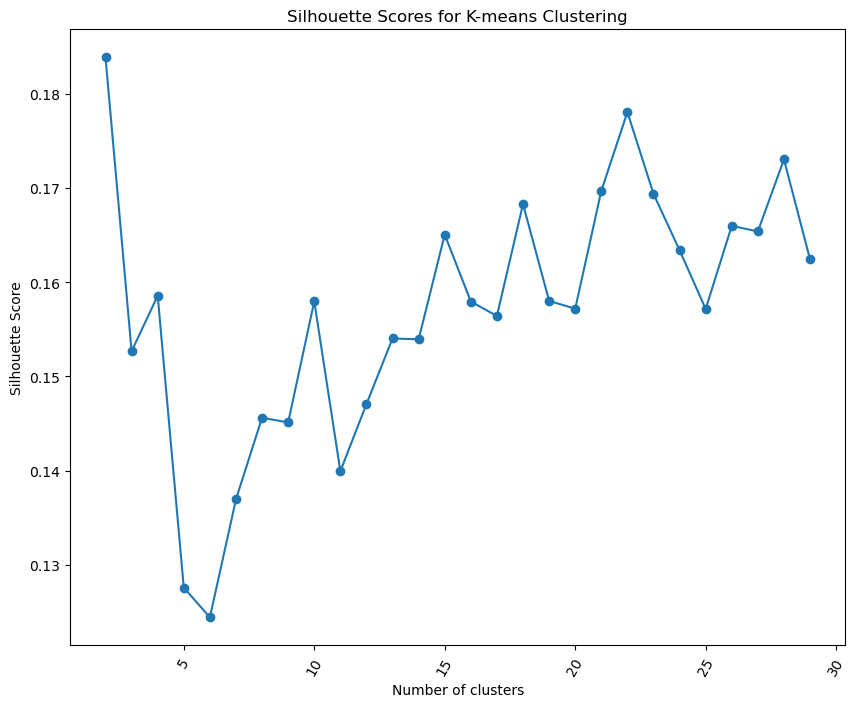

In [17]:
# K-means clustering from k=2 to k=8
results = []
silhouette_scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10).fit(df_pca)
    results.append(kmeans)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Plot silhouette scores (equivalent to AIC/BIC/ICL plot)
plt.figure(figsize=(10, 8))
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-means Clustering')
plt.xticks(rotation=60)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Optimal No. of Clusters

In [18]:
# If WCSS has a different length, adjust the range accordingly
kl = KneeLocator(range(1, len(WCSS)+1), WCSS, curve='convex', direction='decreasing')

# Now find the elbow point
print(kl.elbow)

6


### Clustering of Features

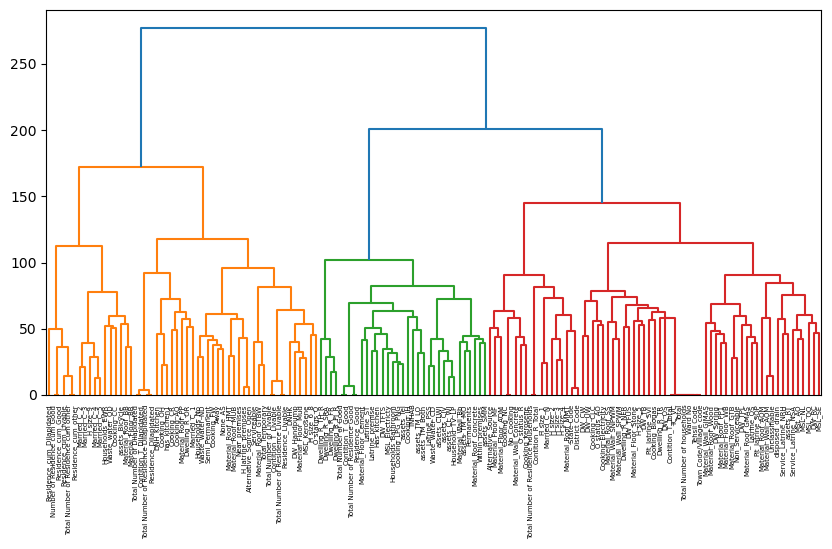

In [19]:
# Step 1: Hierarchical clustering
dist_matrix = pdist(num_df_scaled.T)
Z = linkage(dist_matrix, method='ward')

# Step 2: Plot a dendrogram
plt.figure(figsize=(10, 5))
dendro = dendrogram(Z, labels=num_df_scaled.columns, orientation='top', leaf_rotation=90)

# Extract the order of clustered variables
cluster_order = dendro['ivl']

# Show the plot
plt.show()


In [20]:
# Silhoette Score for the chosen number of clusters
silhouette_score(df_pca, kmeans.labels_)

0.162419949932243

### EDA - Post Clustering

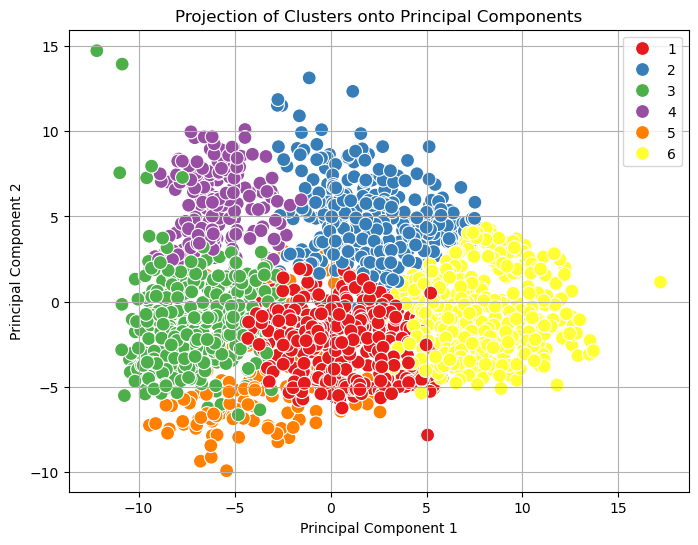

In [21]:
# Step 1: Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=kl.elbow, n_init=10,init="k-means++")
kmeans.fit(df_pca)  # Fit KMeans to the original data
MD_x4_labels = kmeans.labels_ + 1  # Get the cluster labels and adjust to [1, 2, 3, 4]

# Step 3: Create a scatter plot of the projected data (first two principal components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=MD_x4_labels, palette='Set1', s=100)

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Clusters onto Principal Components')


# Show the plot
plt.grid(True)
plt.show()


<Axes: xlabel='cluster', ylabel='percent'>

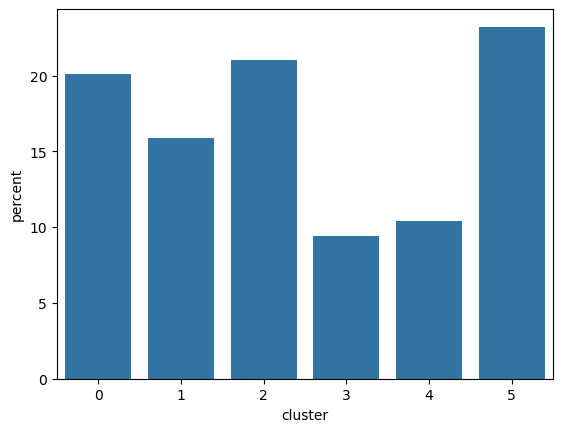

In [22]:
num_census['cluster'] = kmeans.predict(df_pca)
sns.countplot(x=num_census['cluster'],stat='percent')

## Classification of the Segments
### Train-Test Data

In [23]:
X,y = num_census.drop(["cluster"],axis=1),num_census["cluster"]
X,y

(      State Code  District Code  Tehsil Code  Town Code/Village code  Ward No  \
 0              1              1            0                       0        0   
 1              1              1            0                       0        0   
 2              1              1            0                       0        0   
 3              1              2            0                       0        0   
 4              1              2            0                       0        0   
 ...          ...            ...          ...                     ...      ...   
 1903          35            639            0                       0        0   
 1904          35            639            0                       0        0   
 1905          35            640            0                       0        0   
 1906          35            640            0                       0        0   
 1907          35            640            0                       0        0   
 
       Total N

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape

((1526, 151), (382, 151))

### Feature Scaling

In [25]:
## scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [26]:
# Adjust LogisticRegression for multinomial classification
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

## predictions
preds = clf.predict(X_test)

In [27]:
## performmance of the model
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        77
           1       1.00      0.95      0.97        61
           2       0.99      1.00      0.99        80
           3       1.00      0.97      0.99        36
           4       1.00      1.00      1.00        39
           5       0.97      0.99      0.98        89

    accuracy                           0.98       382
   macro avg       0.98      0.98      0.98       382
weighted avg       0.98      0.98      0.98       382



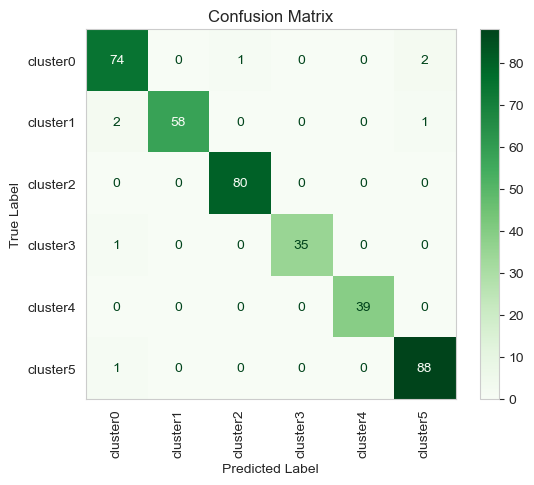

In [28]:
sns.set_style("whitegrid", {'axes.grid' : False})

cm = confusion_matrix(y_test,preds,labels=[i for i in range(0,kl.elbow)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[f"cluster{i}" for i in range(0,kl.elbow)])
disp.plot(cmap='Greens',colorbar=True,)
plt.xlabel('Predicted Label')
plt.xticks(rotation=90)
plt.ylabel('True Label')
plt.title('Confusion Matrix')
#plt.savefig('count12.png')
plt.show()

### Decision Tree

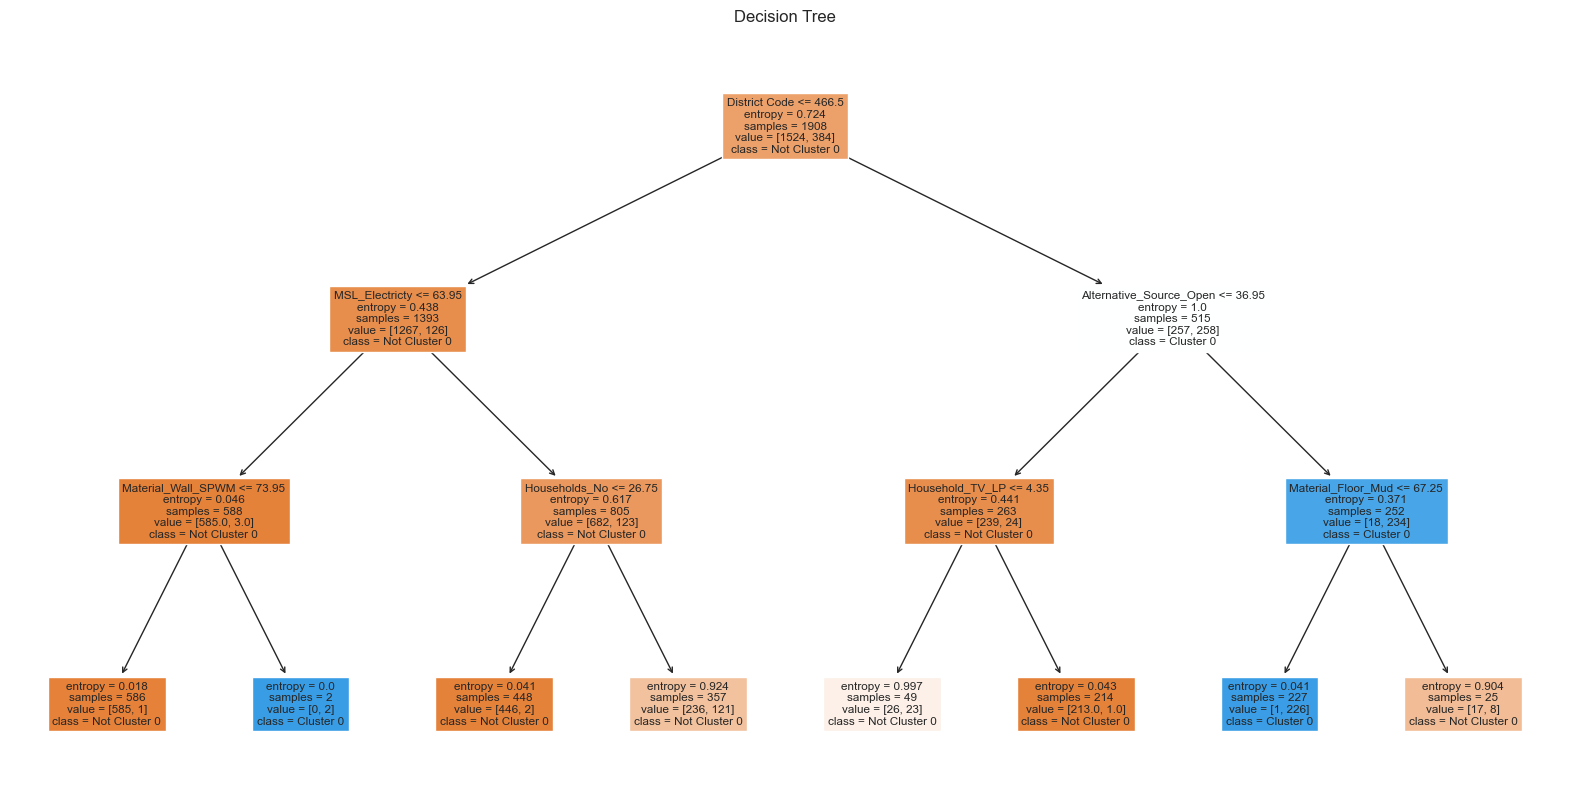

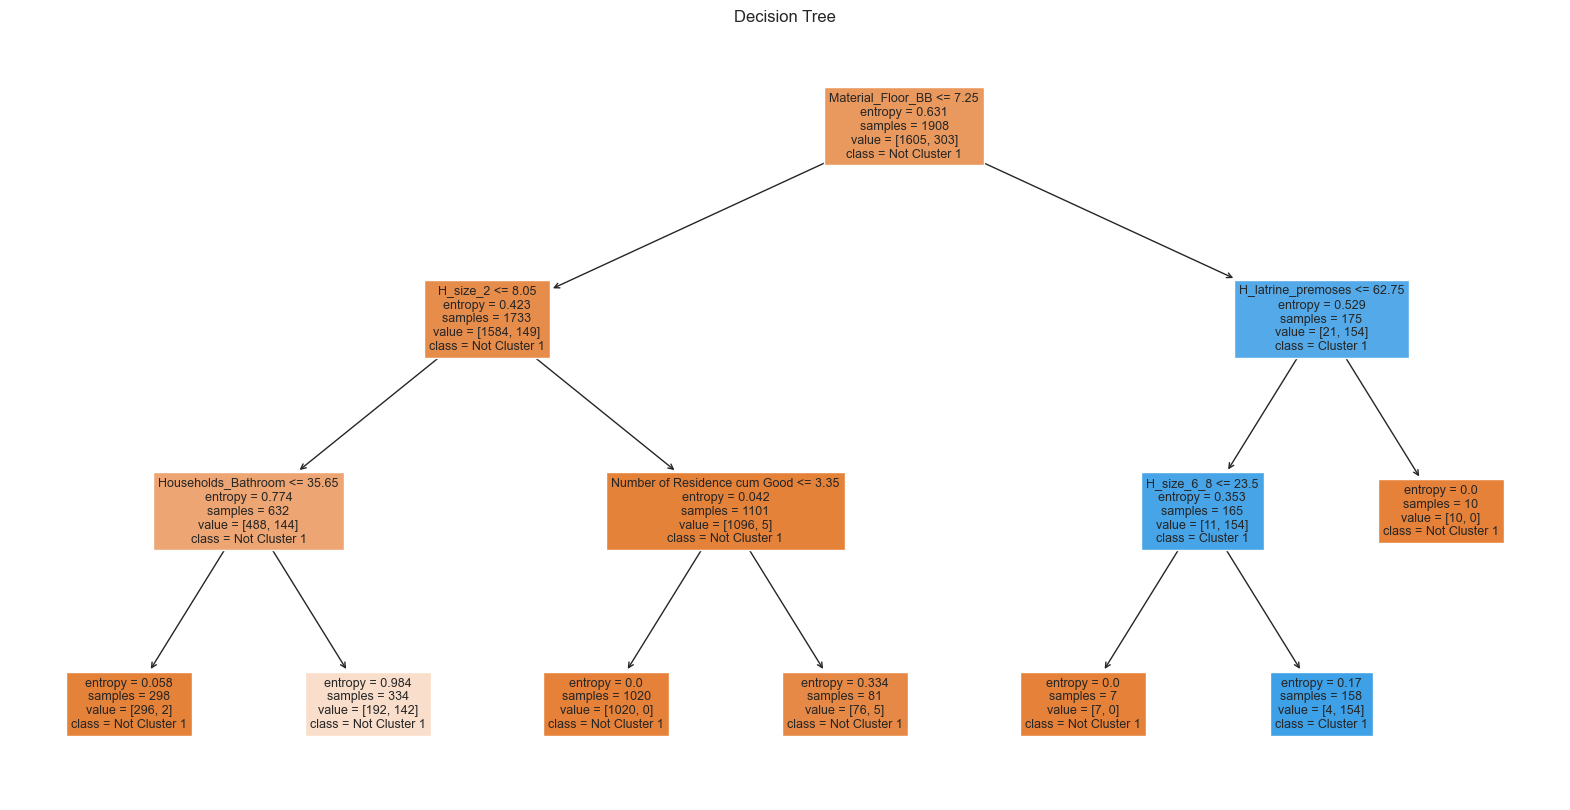

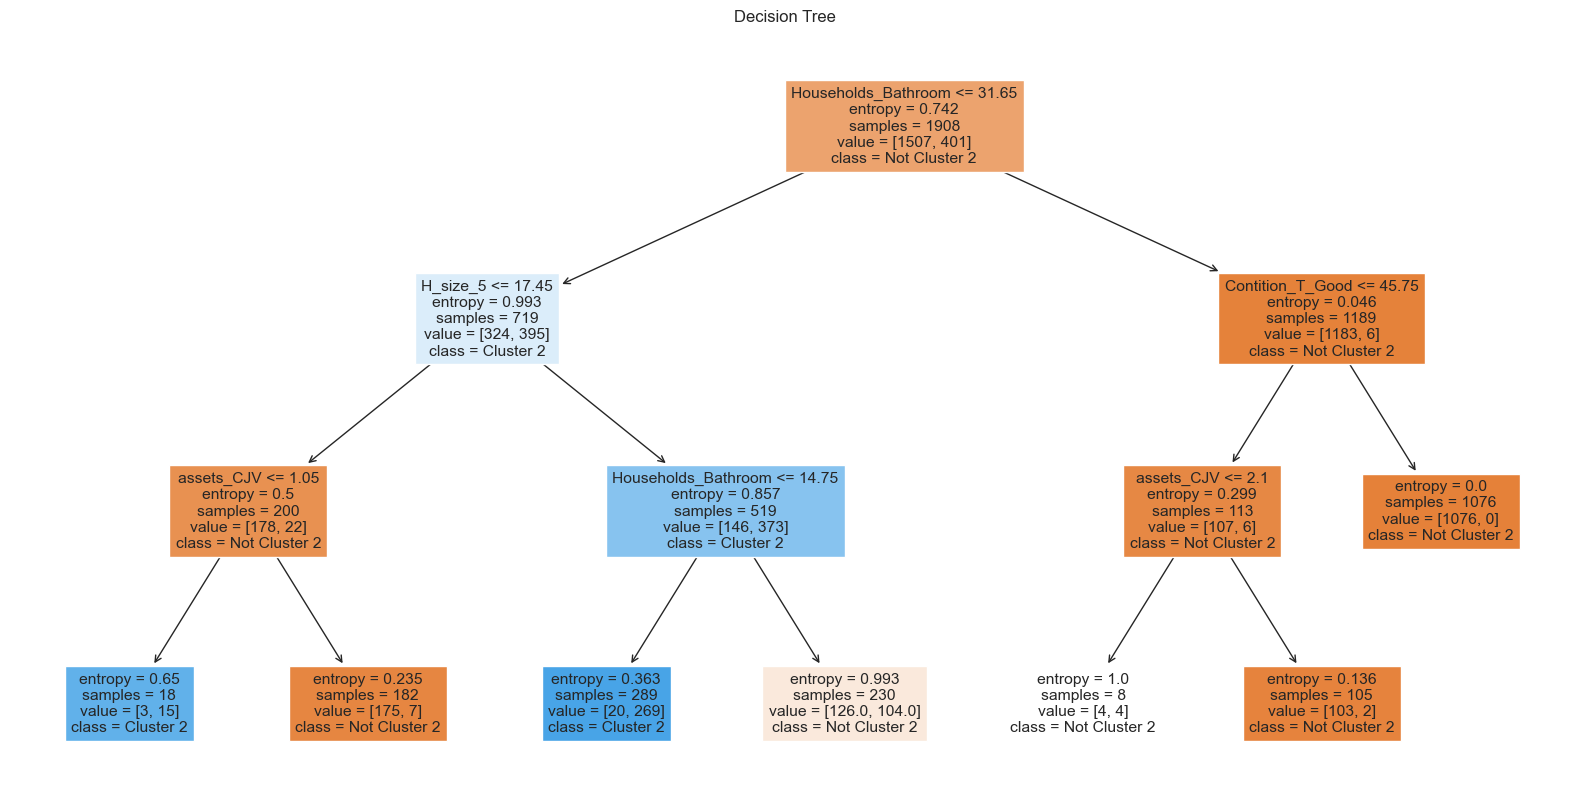

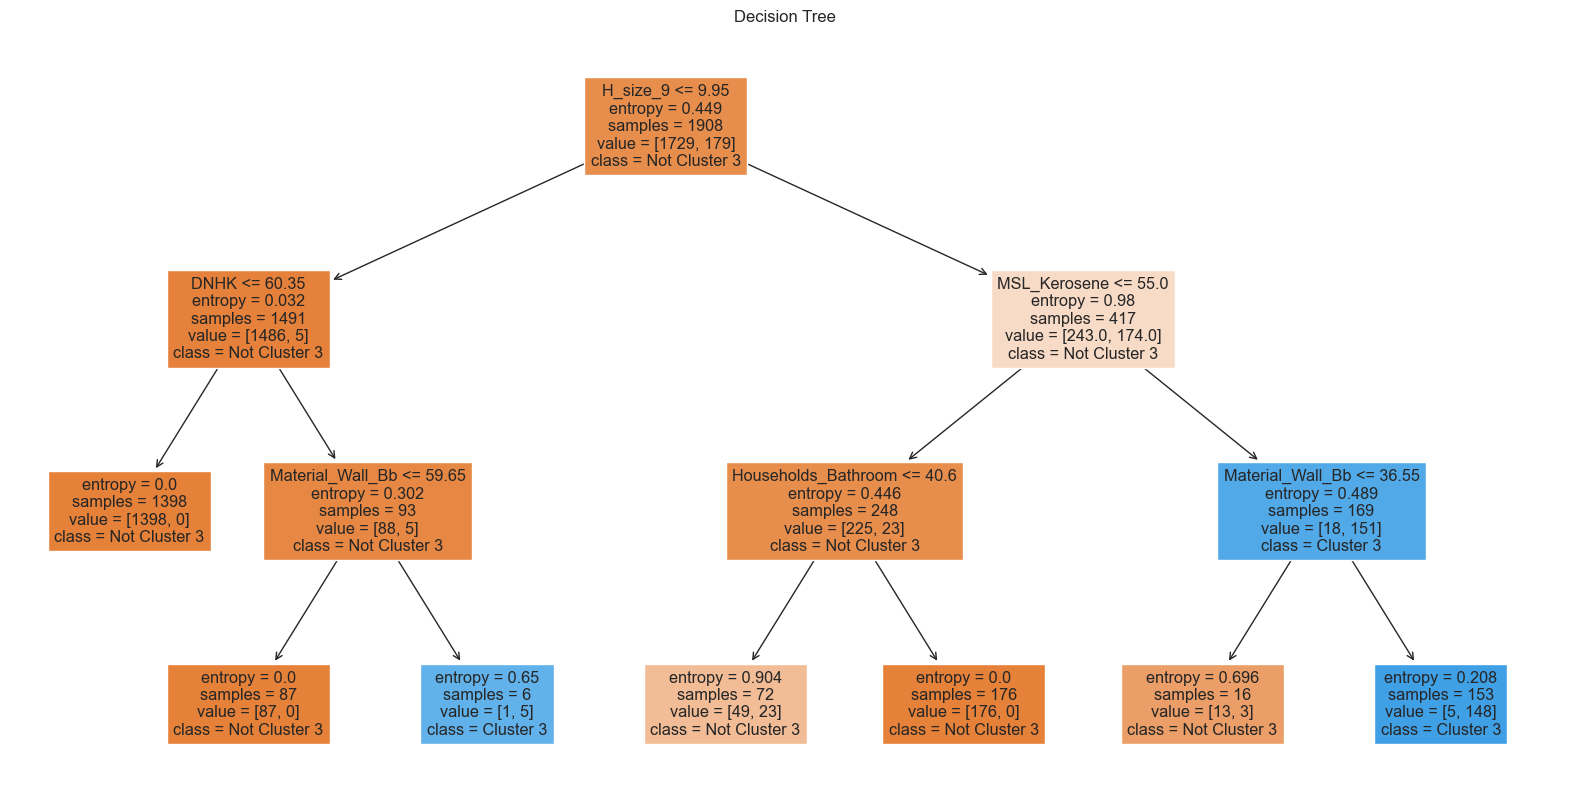

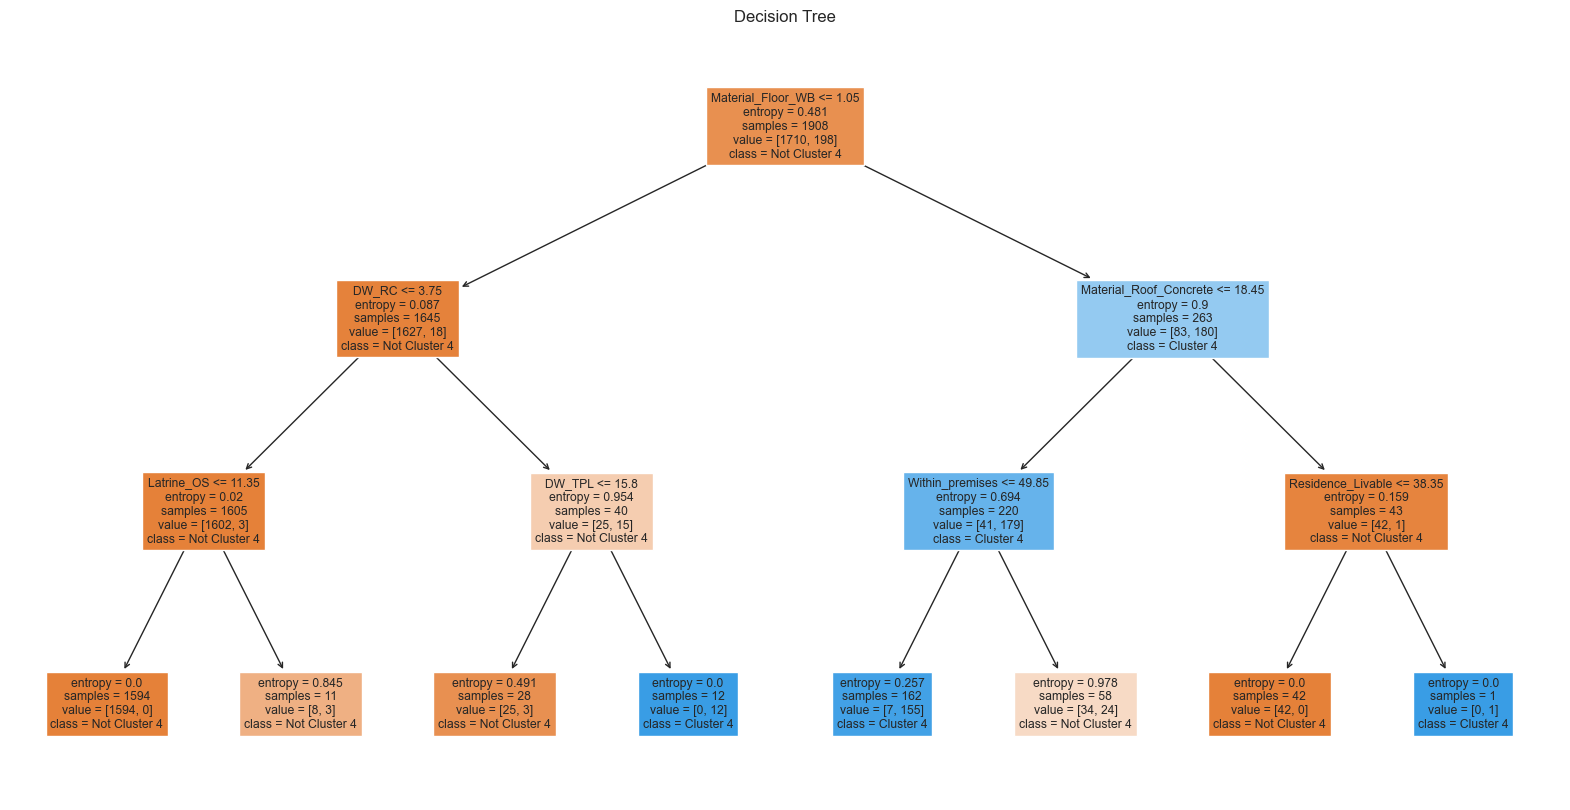

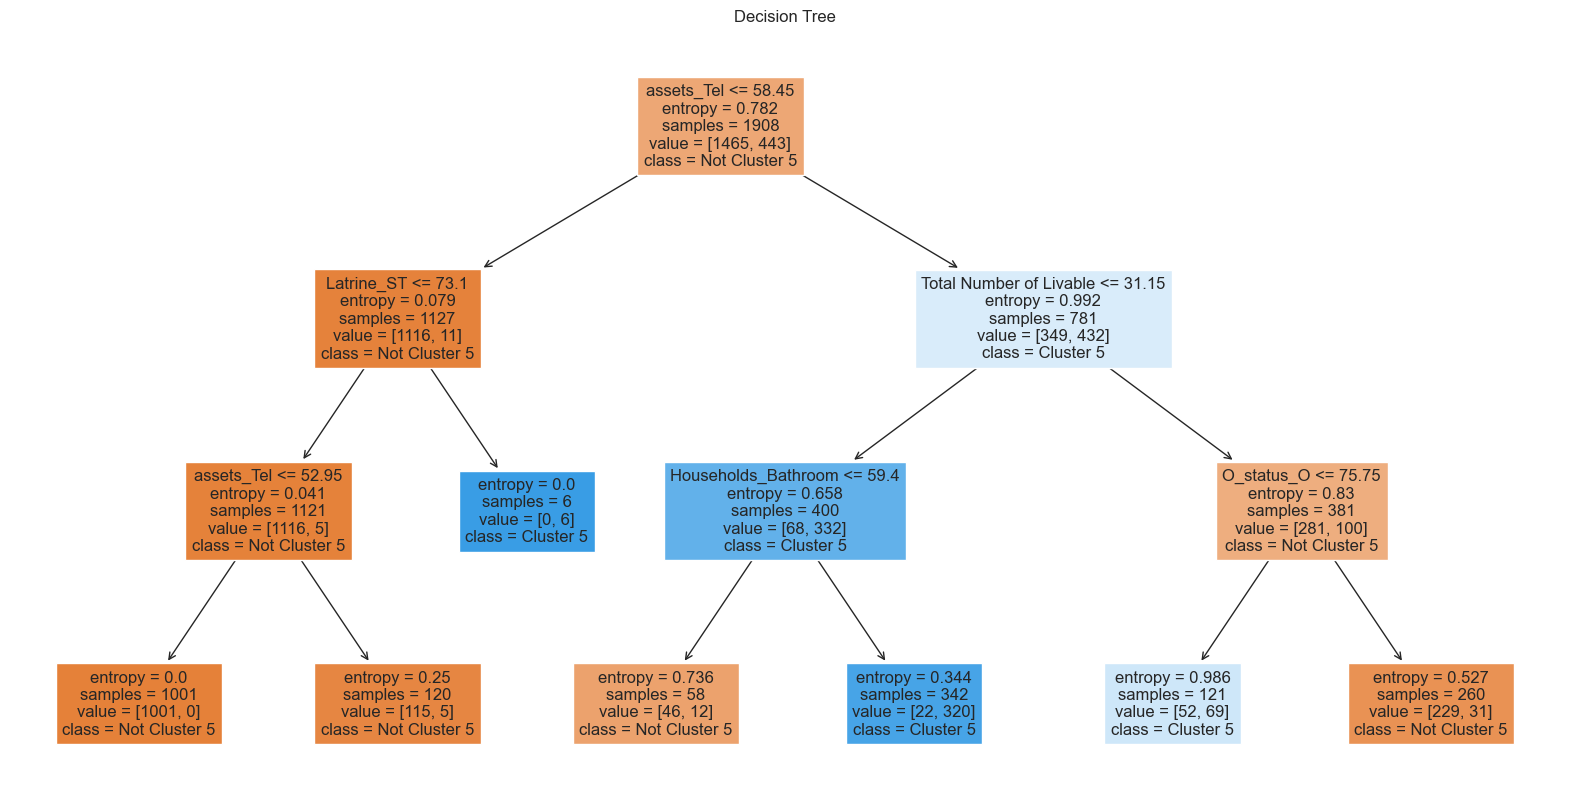

In [29]:
for i in range(0,kl.elbow):

    # Define the target and features
    X = num_census.drop(columns=["cluster"],axis=1)
    y = (kmeans.labels_ == i).astype(int)  # Target variable

    # Convert categorical variables to dummy variables
    X = pd.get_dummies(X, drop_first=True)

    # Create and fit the decision tree classifier with max depth of 3
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Set max_depth to 3
    tree.fit(X, y)

    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=X.columns, class_names=[f'Not Cluster {i}', f'Cluster {i}'],filled=True)
    plt.title('Decision Tree')
    plt.show()


## Segment Profiling

In [38]:
# Feature combinations list
feature_combinations = [
    ('assets_Tel', 'Latrine_ST', 'Households_Bathroom'),
    ('Total Number of Livable', 'Households_Bathroom', 'O_status_O'),
    ('Households_Bathroom', 'DW_Handpump', 'H_size_9'),
    ('Households_Bathroom', 'Material_Roof_MUB', 'H_size_9'),
    ('Households_Bathroom', 'Contition_T_Good', 'assets_CJV'),
    ('Material_Floor_WB', 'Latrine_OS', 'DW_RC'),
    ('Material_Wall_Bb', 'DNHK', 'H_size_9'),
    ('MSL_Kerosene', 'Households_Bathroom', 'Waste_water_ND'),
    ('Alternative_Source_Open', 'Material_Floor_Mud', 'Household_TV_LP'),
    ('MSL_Electricty', 'Households_No', 'Material_Wall_SPWM')
]

# Group by 'cluster' and calculate the mean and std for each feature
median_df = num_census.groupby('cluster').median().reset_index()
std_df = num_census.groupby('cluster').std().reset_index()

# Define a consistent color map for the clusters
cluster_color_map = {
    '0': 'chartreuse',
    '1': 'turquoise',
    '2': 'fuchsia',
    '3': 'salmon',
    '4': 'mediumpurple',
    '5': 'moccasin'
}

# Loop over feature combinations and create 3D scatter plots
for i, combination in enumerate(feature_combinations):
    x_feature, y_feature, z_feature = combination

    # Calculate standard deviation for each feature based on its cluster
    num_census['size'] = num_census['cluster'].map(std_df.set_index('cluster')[x_feature]) + \
                         num_census['cluster'].map(std_df.set_index('cluster')[y_feature]) + \
                         num_census['cluster'].map(std_df.set_index('cluster')[z_feature])
    num_census['size'] = (num_census['size'] / num_census['size'].max()) * 10  # Normalize sizes

    # Create 3D scatter plot for all points without legend
    fig = px.scatter_3d(num_census,
                        x=x_feature,
                        y=y_feature,
                        z=z_feature,
                        color=num_census['cluster'].astype(str),  # Color based on cluster
                        title=f'{x_feature} vs {y_feature} vs {z_feature} (All Points & Cluster Means)',
                        labels={x_feature: x_feature, y_feature: y_feature, z_feature: z_feature},
                        opacity=0.3,
                        category_orders={'cluster': ['0', '1', '2', '3', '4', '5']},
                        color_discrete_map=cluster_color_map,  # Apply the color map to individual points
                        size='size')  # Use the calculated sizes for points

    # Remove legend for the first scatter plot (individual points)
    fig.update_traces(showlegend=False, marker=dict(size=3))

    # Add the mean values as a separate trace (with larger, distinct markers)
    fig_mean = px.scatter_3d(median_df,
                             x=x_feature,
                             y=y_feature,
                             z=z_feature,
                             color=median_df['cluster'].astype(str),  # Color based on cluster
                             opacity=1,
                             category_orders={'cluster': ['0', '1', '2', '3', '4', '5']},
                             color_discrete_map=cluster_color_map)  # Apply the same color map to mean points

    # Update marker size and style for the mean values
    fig_mean.update_traces(marker=dict(size=10, symbol='diamond', opacity=1, 
                                       line=dict(width=2, color='black')))  # Border for diamonds

    # Combine the mean plot with the original plot
    fig.add_traces(fig_mean.data)

    # Update layout to adjust the margins
    fig.update_layout(
        margin=dict(l=0, r=0, b=20, t=50),  # Adjust bottom margin (b) to avoid cutting off
        scene=dict(aspectmode='cube') # Ensure aspect ratio is correct
    )

    # Save the plot as a PNG file
    fig.write_image(f"Census_Plots/{x_feature} vs {y_feature} vs {z_feature}.png")


    # Show the plot
    fig.show()


In [32]:

# Extract unique features
unique_features = list(set([feature for combo in feature_combinations for feature in combo]))

# Assuming 'fnl_df' contains your data and 'cluster' is the column with cluster labels
# Group by 'cluster' and calculate the mean for the unique features
median_df = num_census.groupby('cluster')[unique_features].median().reset_index()

# Set 'cluster' as the index
median_df.set_index('cluster', inplace=True)

# Display the DataFrame
median_df

assets_CJV  Material_Wall_Bb  Contition_T_Good  DNHK  \
cluster                                                         
0               2.7             43.40             58.95  21.9   
1               5.9             81.90             54.60  32.8   
2               1.3             23.80             37.70  43.1   
3               2.2             60.80             39.30  64.8   
4               4.7              7.05             45.75   6.9   
5               8.7             58.70             71.00  10.5   

         Material_Floor_WB  DW_RC  Total Number of Livable  Household_TV_LP  \
cluster                                                                       
0                     0.10    0.3                     36.7              2.1   
1                     0.10    0.1                     40.6              5.0   
2                     0.10    0.9                     56.0              0.6   
3                     0.30    0.1                     53.6              0.8   
4                    16.05    4.5                     49.0              1.5   
5                     0.10    0.1                     26.9              9.1   

         assets_Tel  Households_Bathroom  ...  DW_Handpump  MSL_Kerosene  \
cluster                                   ...                              
0             53.25                44.15  ...        10.75         10.80   
1             64.30                61.80  ...        28.60         11.50   
2             18.80                 9.80  ...        57.20         53.40   
3             20.50                15.00  ...        75.10         76.10   
4             39.50                38.10  ...         0.85         14.65   
5             77.30                81.00  ...         2.80          3.20   

         Material_Wall_SPWM  Latrine_OS  Material_Floor_Mud  \
cluster                                                       
0                      9.25         1.2                35.3   
1                      2.00         2.1                29.0   
2                      0.90         1.3                81.6   
3                      1.30         1.6                79.2   
4                      0.70         9.6                45.7   
5                      6.40         1.3                 9.8   

         Alternative_Source_Open  Material_Roof_MUB  Latrine_ST  H_size_9  \
cluster                                                                     
0                           54.5               24.1       24.15       4.0   
1                           27.9                6.5       43.60       9.2   
2                           82.1               48.9        9.10       5.0   
3                           78.0               23.1       13.30      15.7   
4                           20.5                3.2       17.10       6.4   
5                           11.1                7.9       49.10       4.5   

         Households_No  
cluster                 
0                37.05  
1                19.70  
2                77.40  
3                54.70  
4                41.35  
5                10.30  

[6 rows x 23 columns]

### Conclusion

| **Cluster Number** | **Cluster Name**                 | **Describing Features**                                                                                  |
|--------------------|----------------------------------|----------------------------------------------------------------------------------------------------------|
| 0                  | Balanced Infrastructure Cluster  | Moderate good condition houses (58.95%), decent livable houses (36.7%), low dilapidated houses (3.8%).    |
| 1                  | Slightly Livable Cluster         | Lower good condition houses (54.6%), slightly higher livable houses (40.6%), low dilapidated houses (4.4%).|
| 2                  | Highly Livable Cluster           | Fewer good condition houses (37.7%), high livable houses (56.0%), low dilapidated houses (5.4%).          |
| 3                  | Average Condition Cluster        | Moderate good condition houses (39.3%), decent livable houses (53.6%), slightly higher dilapidated (7.7%).|
| 4                  | Strong Infrastructure Cluster    | Higher good condition houses (45.75%), moderate livable houses (49.0%), low dilapidated houses (4.1%).    |
| 5                  | Excellent Infrastructure Cluster | Highest good condition houses (71.0%), lower livable houses (26.9%), very low dilapidated houses (2.2%).   |